## Часть 1. Количественный подход - подготовка

#### Импорт библиотек

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import typing
import os
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
ex_file = pd.read_excel('logs.xlsx')

#### Разделим всю временную шкалу на семестры

##### 1 семестр: сентябрь 2023 - январь 2024

In [15]:
semestr1 = ex_file[ex_file['semestr'] == 'осень 2023']

In [16]:
df1 = semestr1.pivot_table(index='name', columns=['num_of_mes', 'type'], values='year', aggfunc=np.count_nonzero)
df1.reset_index(inplace=True)
df1['semestr'] = 1
df1 = df1.set_axis(df1.columns.tolist(), axis=1).reset_index(drop=True)

In [17]:
cols = ['name', '1-activity', '1-click', '1-exercise', '1-reading', '1-test', '1-training', 
                '2-activity', '2-click', '2-exercise', '2-reading', '2-test', '2-training', 
                '3-activity', '3-click', '3-exercise', '3-reading', '3-test', '3-training', 
                '4-activity', '4-click', '4-exercise', '4-reading', '4-test', '4-training', 
                '5-activity', '5-click', '5-exercise', '5-reading', '5-test', '5-training',
        'semestr']
d_cols = dict(zip(df1.columns, cols))

In [18]:
df1 = df1.rename(columns=d_cols)
df_1 = df1.fillna(0)

##### 2 семестр: февраль 2024 - май 2024

In [20]:
semestr2 = ex_file[ex_file['semestr'] == 'весна 2024']

In [21]:
df2 = semestr2.pivot_table(index='name', columns=['num_of_mes', 'type'], values='year', aggfunc=np.count_nonzero)
df2.reset_index(inplace=True)
df2['semestr'] = 2
df2 = df2.set_axis(df2.columns.tolist(), axis=1).reset_index(drop=True)

In [22]:
df2 = df2.rename(columns=d_cols)
df_2 = df2.fillna(0)

#### Общий датасет

In [24]:
df_count = pd.concat([df2,df1], ignore_index=True)
df_count = df_count.fillna(0)

In [25]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1691 non-null   object 
 1   1-activity  1691 non-null   float64
 2   1-click     1691 non-null   float64
 3   1-exercise  1691 non-null   float64
 4   1-reading   1691 non-null   float64
 5   1-test      1691 non-null   float64
 6   1-training  1691 non-null   float64
 7   2-activity  1691 non-null   float64
 8   2-click     1691 non-null   float64
 9   2-exercise  1691 non-null   float64
 10  2-reading   1691 non-null   float64
 11  2-test      1691 non-null   float64
 12  2-training  1691 non-null   float64
 13  3-activity  1691 non-null   float64
 14  3-click     1691 non-null   float64
 15  3-exercise  1691 non-null   float64
 16  3-reading   1691 non-null   float64
 17  3-test      1691 non-null   float64
 18  3-training  1691 non-null   float64
 19  4-activity  1691 non-null  

### Построим графики частоты встречающихся действий по семестрам

In [27]:
semestr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313309 entries, 374 to 385854
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_of_action  313309 non-null  datetime64[ns]
 1   name            313309 non-null  object        
 2   type            313309 non-null  object        
 3   year            313309 non-null  int64         
 4   month           313309 non-null  int64         
 5   semestr         313309 non-null  object        
 6   num_of_mes      313309 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 19.1+ MB


In [28]:
semestr2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72546 entries, 0 to 291685
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_of_action  72546 non-null  datetime64[ns]
 1   name            72546 non-null  object        
 2   type            72546 non-null  object        
 3   year            72546 non-null  int64         
 4   month           72546 non-null  int64         
 5   semestr         72546 non-null  object        
 6   num_of_mes      72546 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.4+ MB


In [29]:
pivot = pd.pivot_table(semestr1, values=['name'], index=[semestr1['date_of_action'].dt.isocalendar().week], columns=['type'], aggfunc="count", fill_value=0)
pivot.index = [pivot.index[c]-34 if pivot.index[c]>34 else pivot.index[c]+18 for c in range(len(pivot.index))]
pivot.sort_index(inplace=True)
pivot

name                                       
type activity click exercise reading   test training
1         158   659      143     449   1295        0
2         114  2387     1266    1316   2945       27
3         147  1980     1409     854   3214        3
4         110  2775     1725    1398   6789      190
5         168  3047     2448    1490   8332       95
6          86  2336     2088    1695   3975      106
7          93  2212     2151    1191   3820      293
8          65  2419     1852    2159   4400      557
9         101  2551     2092    1894   4291      535
10         62  2328     1824    1525   5795     1111
11        199  3799     2866    1441  11283      391
12        135  2891     2338    2237   4763      717
13         75  2774     2192    1779   5286      755
14        112  3722     1933    2360   6916     1139
15         99  3632     2461    2691   6657     2526
16        151  4578     2604    3301  11019     3965
17        581  9549     3848    8030  18661    11029
18       1361  8056     3440    1701  22104      736
19        236   898      808     820    678       20
20        419  1364      993    1089   1345      290
21        232  1391      548    1005   1578      264
22         60   453      185     159    888        0
23          7    92       41      15      8        0

In [30]:
pivot_dict = {'activity': pivot[('name', 'activity')],
              'exercise': pivot[('name', 'exercise')],
              'reading': pivot[('name', 'reading')],
              'training': pivot[('name', 'training')],
              'test': pivot[('name', 'test')],
              'click': pivot[('name', 'click')]}
df_weekly_actions = pd.DataFrame(pivot_dict)

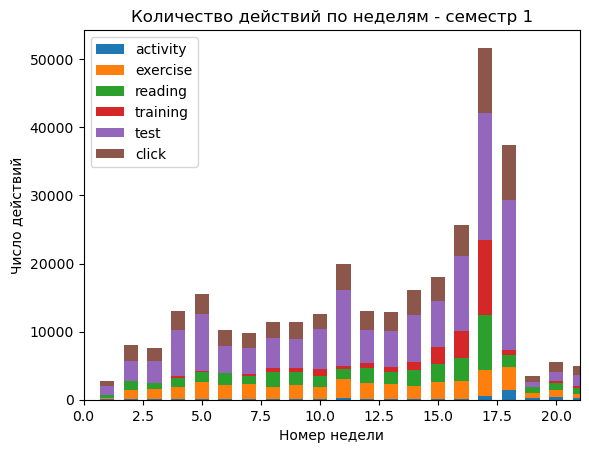

In [31]:
import matplotlib.pyplot as plt
category_names = (df_weekly_actions.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam, pivd in pivot_dict.items():
    p = ax.bar(category_names, pivd, width, label=nam, bottom=bottom)
    bottom += pivd
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий по неделям - семестр 1')
ax.set(xlim = (0,21), xlabel = 'Номер недели', ylabel = 'Число действий')
ax.legend()

plt.show()

<Axes: >

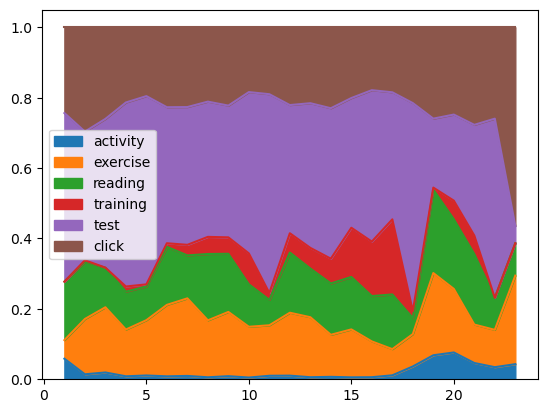

In [32]:
df_weekly_actions.div(df_weekly_actions.sum(axis=1), axis=0).plot.area()

In [33]:
pivot = pd.pivot_table(semestr2, values=['name'], index=[semestr2['date_of_action'].dt.isocalendar().week], columns=['type'], aggfunc="count", fill_value=0)
pivot.index = [pivot.index[c]-4 if pivot.index[c]>4 else pivot.index[c]+18 for c in range(len(pivot.index))]
pivot.sort_index(inplace=True)
pivot

name                                      
type activity click exercise reading  test training
1           3   357       89     117   559       24
2           4   594      283     256   890        5
3          19   977      309     204  3330       27
4          29   753      261     172  2203        7
5          48   620      274     177  1498       48
6          55   729      302     345   822       97
7          74  1019      492     530  1453      226
8          32   940      316     399  3094      280
9          51  1214      299     229  1596      324
10         67   872      336     256  2153      178
11         11   678      323     200   895      245
12         17   705      663     239   576      170
13         13   882      453     134  1032      119
14          7   829      379     247  1286      111
15         39   732      649     226  1125      688
16         20   726      441     203   730      934
17         80  1207      297     257  1407     4042
18        149  1564      685    1199  4248      390
19        363   766      676    3027    50       77
20        113   308      285     298    67       47
21         67   363      196     444    64       95
22          2    38       13      12     6        0

In [34]:
pivot_dict = {'activity': pivot[('name', 'activity')],
              'exercise': pivot[('name', 'exercise')],
              'reading': pivot[('name', 'reading')],
              'training': pivot[('name', 'training')],
              'test': pivot[('name', 'test')],
              'click': pivot[('name', 'click')]}
df_weekly_actions = pd.DataFrame(pivot_dict)

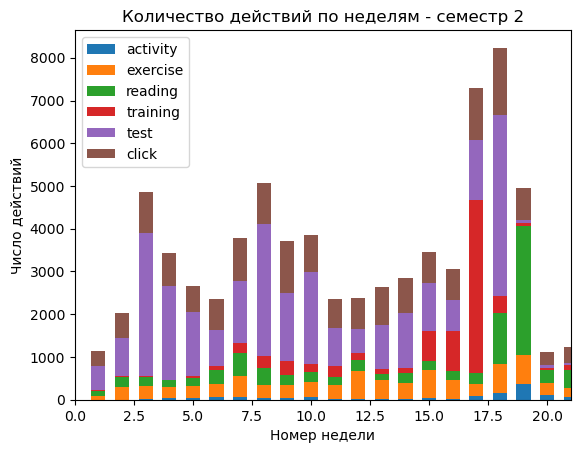

In [35]:
import matplotlib.pyplot as plt
category_names = (df_weekly_actions.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam, pivd in pivot_dict.items():
    p = ax.bar(category_names, pivd, width, label=nam, bottom=bottom)
    bottom += pivd
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий по неделям - семестр 2')
ax.set(xlim = (0,21), xlabel = 'Номер недели', ylabel = 'Число действий')
ax.legend()

plt.show()

<Axes: >

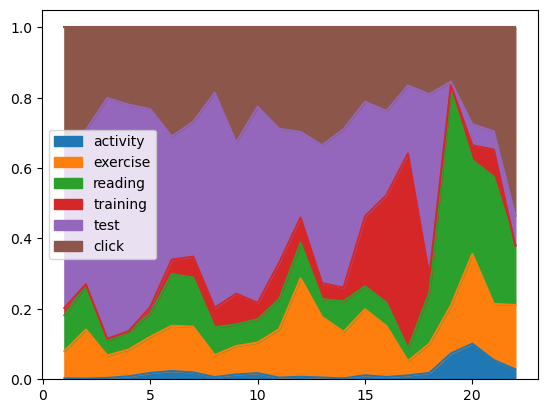

In [36]:
df_weekly_actions.div(df_weekly_actions.sum(axis=1), axis=0).plot.area()

## Часть 2. Количественный подход - кластеризация

#### Импорт библиотек

In [39]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, v_measure_score, fowlkes_mallows_score
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
#import urbangrammar_graphics as ugg
from sklearn.preprocessing import scale
sns.set(style='whitegrid')
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

#### Основные функции

In [41]:
def hopkins(X,knn): # статистика Хопкинса
    
    from sklearn.neighbors import NearestNeighbors
    from random import sample
    from numpy.random import uniform
    import numpy as np
    from math import isnan
    
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=knn).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)# генерируется псевдонабор данных, имеющих равномерное распределение
 
    ujd = [] # расстояния между исскуственными объектами и их самыми близкими реальными соседями
    wjd = [] # расстояния между реальными объектами
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
def elbow_method(df): # метод локтя
    inertia = []
    num_of_clusters = np.arange(1,14) # наилучшее число клатеров ищем в диапазоне от 1 до 14
    for i in num_of_clusters:
        km = KMeans(n_clusters=i, max_iter=100, random_state=100)
        km.fit(df)    
        inertia.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(num_of_clusters, inertia)
    plt.title('Elbow plot')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Внутриклассовый разброс')
    plt.show()

In [43]:
def clustergram(df): # рисовка кластерограммы
    data = scale(df)

    cgram = Clustergram(range(1, 10), n_init=1000)
    cgram.fit(data)

    ax = cgram.plot(figsize=(10, 8),
                    line_style=dict(color=ugg.COLORS[1]),
                    cluster_style={"color": ugg.COLORS[2]},
                    )
    ax.yaxis.grid(False)
    sns.despine(offset=10)
    ax.set_title('K-Means (scikit-learn)')

In [44]:
def metrics_cluster(df): # метрики устойчивости кластеризации
    print('rand_score')
    print('2 клаcтера:', rand_score(df['icluster2'], df['cluster2']))
    print('4 клаcтера:', rand_score(df['icluster4'], df['cluster4']))
    print()
    print('fowlkes_mallows_score')
    print('2 клаcтера:', fowlkes_mallows_score(df['icluster2'], df['cluster2']))
    print('4 клаcтера:', fowlkes_mallows_score(df['icluster4'], df['cluster4']))
    print()

In [45]:
def metrics_aproach(df): # метрики устойчивости кластеризации
    print('rand_score')
    print('2 клаcтера:', rand_score(df['total aproach'], df['icluster2']))
    print('4 клаcтера:', rand_score(df['total aproach'], df['icluster4']))
    print()
    print('fowlkes_mallows_score')
    print('2 клаcтера:', fowlkes_mallows_score(df['total aproach'], df['icluster2']))
    print('4 клаcтера:', fowlkes_mallows_score(df['total aproach'], df['icluster4']))
    print()

In [46]:
def metrics_marks(df, k): # метрики устойчивости кластеризации
    if k == 2:
        print('rand_score')
        print('2 клаcтера:', rand_score(df['type_of_grade'], df['icluster2']))
        print()
        print('fowlkes_mallows_score')
        print('2 клаcтера:', fowlkes_mallows_score(df['type_of_grade'], df['icluster2']))
    if k == 4:
        print('rand_score')
        print('4 клаcтера:', rand_score(df['final_grade'], df['icluster4']))
        print()
        print('fowlkes_mallows_score')
        print('4 клаcтера:', fowlkes_mallows_score(df['final_grade'], df['icluster4']))

### Кластеризация. Вариант 1

In [48]:
df_1 = df_count[df_count['semestr'] == 1]
df_2 = df_count[df_count['semestr'] == 2]

#### 1 семестр

In [50]:
df11 = df_1.drop(['name', 'semestr'], axis=1)
s = 0
n = 20 # количество вычислений статистики Хопкинса
k = 4 # число ближайщих соседей
for i in range(1, n+1):
    #print(hopkins(dff, k))
    s += hopkins(df11, k)
hop = s/n
hop

0.9470328785654043

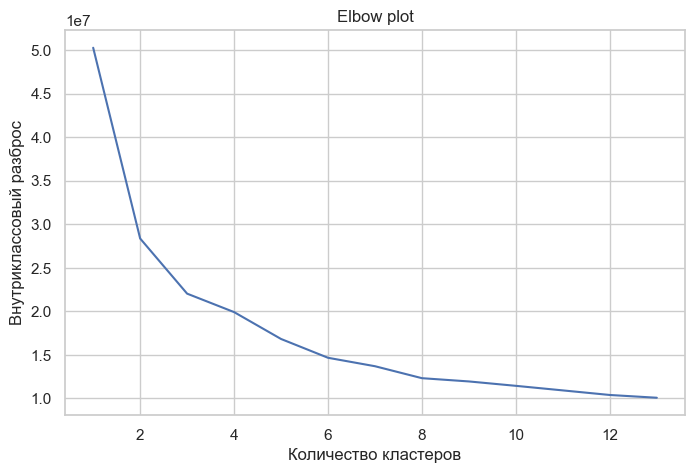

In [51]:
elbow_method(df11)

#### Иерархическая

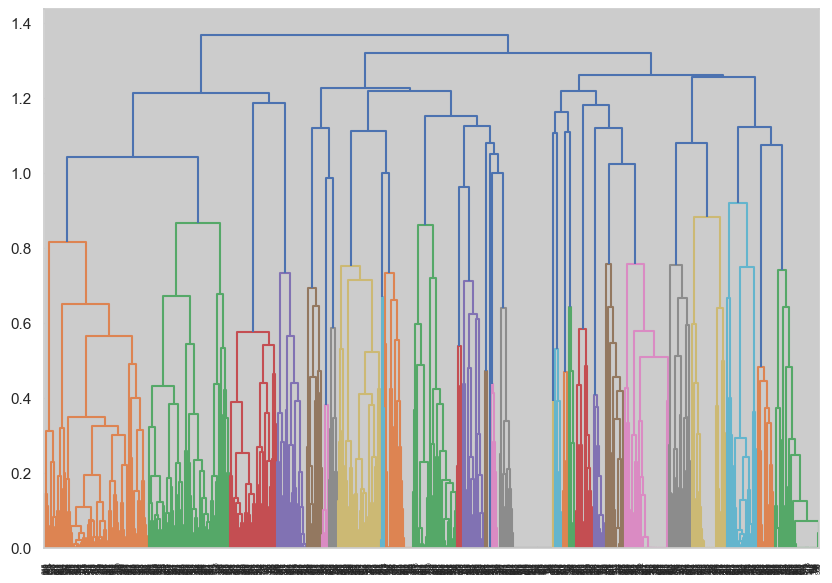

In [53]:
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df11, method='complete', metric='correlation'))

In [54]:
cluster = AgglomerativeClustering(n_clusters=2, metric='correlation', linkage='complete')
df_1['icluster2'] = cluster.fit_predict(df11)
cluster = AgglomerativeClustering(n_clusters=4, metric='correlation', linkage='complete')
df_1['icluster4'] = cluster.fit_predict(df11)

#### 2 семестр

In [56]:
df12 = df_2.drop(['name', 'semestr'], axis=1)
s = 0
n = 20 # количество вычислений статистики Хопкинса
k = 4 # число ближайщих соседей
for i in range(1, n+1):
    #print(hopkins(dff, k))
    s += hopkins(df12, k)
hop = s/n
hop

0.9601380144561562

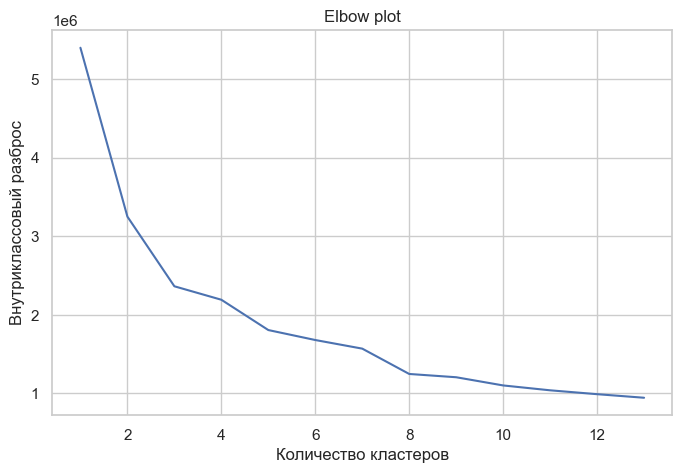

In [57]:
elbow_method(df12)

#### Иерархическая

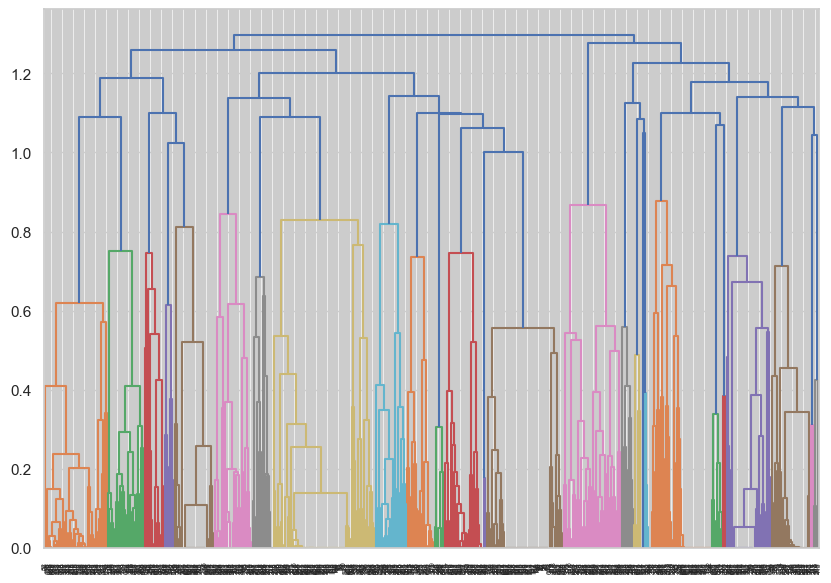

In [59]:
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df12, method='complete', metric='correlation'))
plt.savefig('dend1.jpg', dpi=300)

In [60]:
cluster = AgglomerativeClustering(n_clusters=2, metric='correlation', linkage='complete')
df_2['icluster2'] = cluster.fit_predict(df12)
cluster = AgglomerativeClustering(n_clusters=4, metric='correlation', linkage='complete')
df_2['icluster4'] = cluster.fit_predict(df12)

#### Диаграммы размаха для 1 семестра

In [62]:
cols = cols[1:-1]

In [63]:
df_1['icluster4'].value_counts()

icluster4
3    334
2    312
0    192
1    148
Name: count, dtype: int64

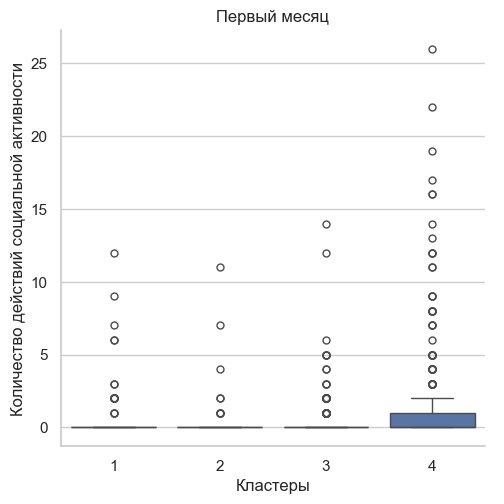

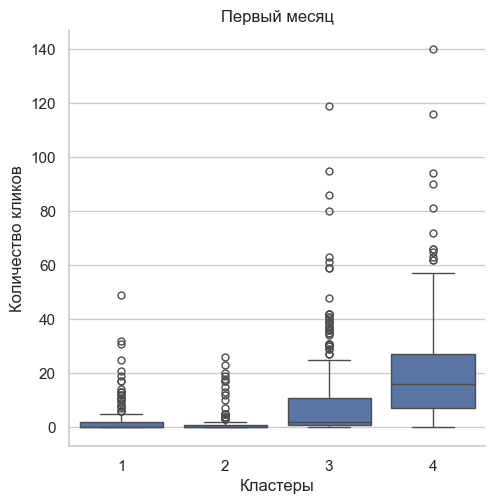

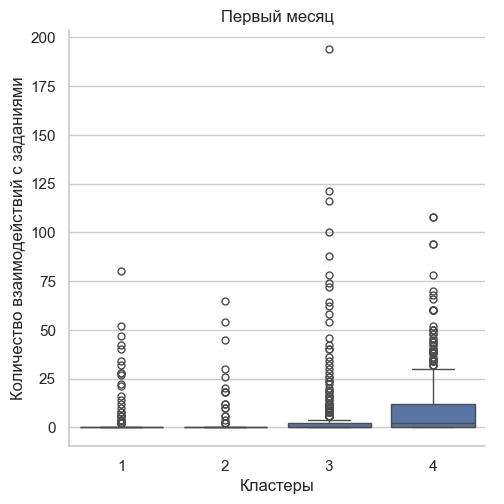

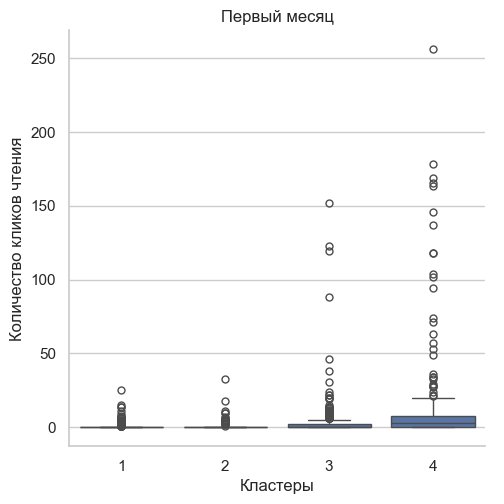

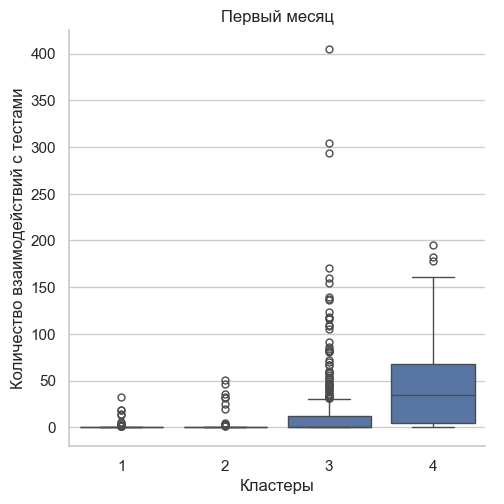

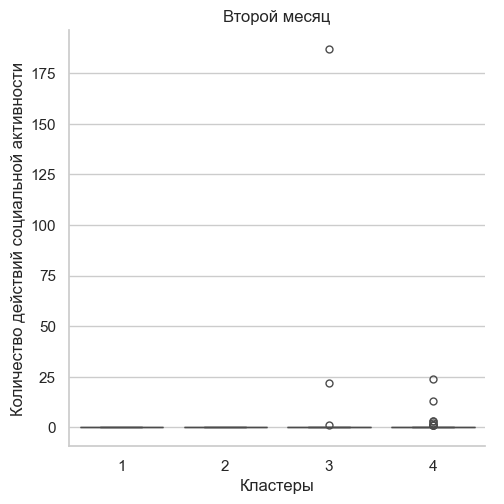

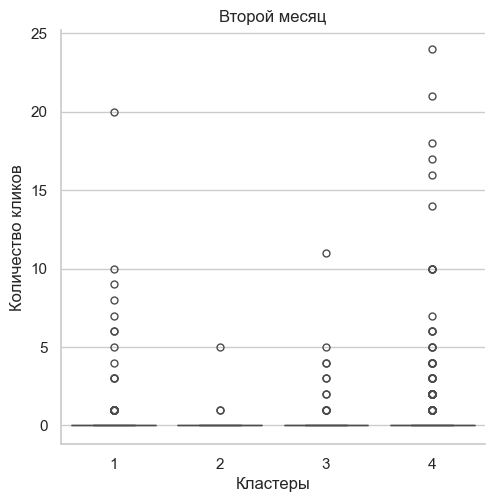

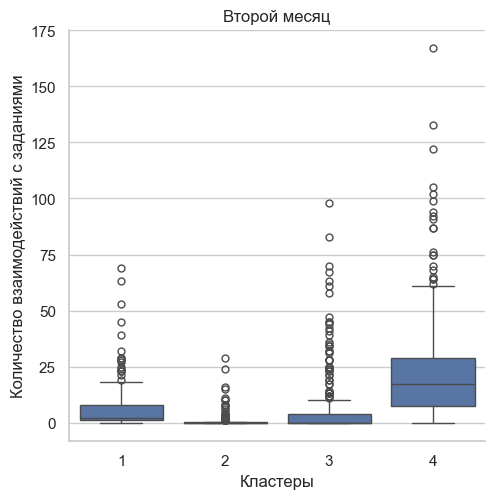

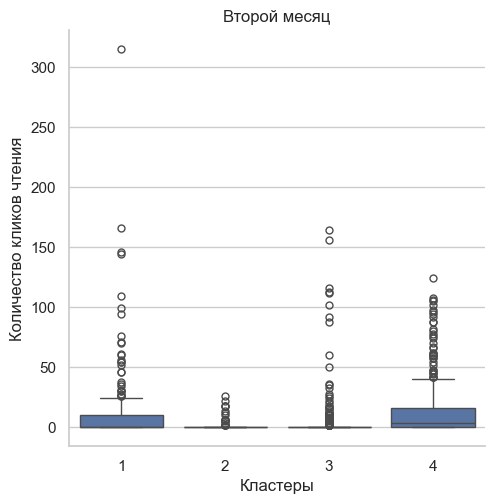

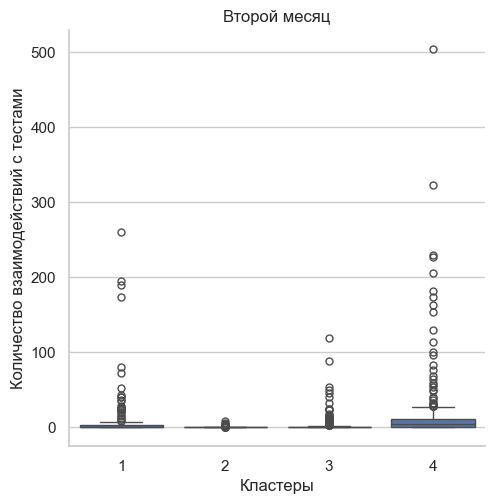

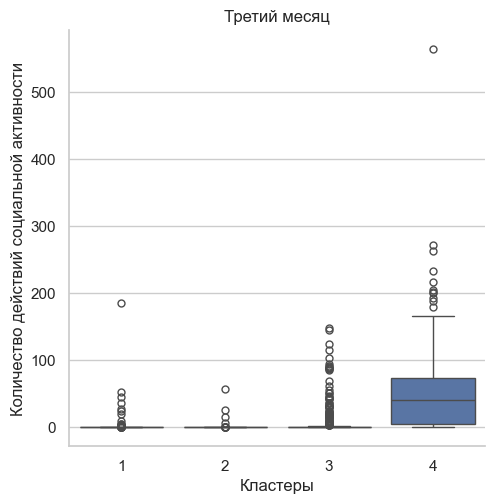

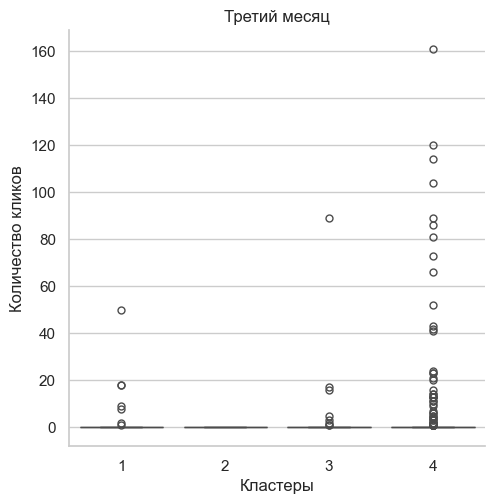

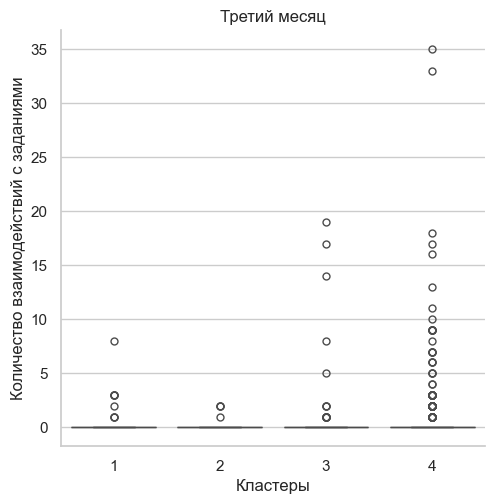

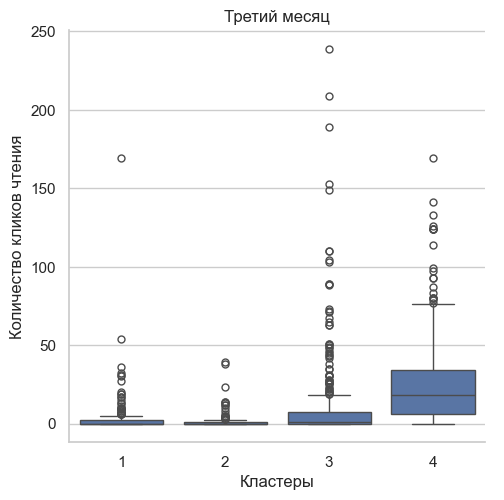

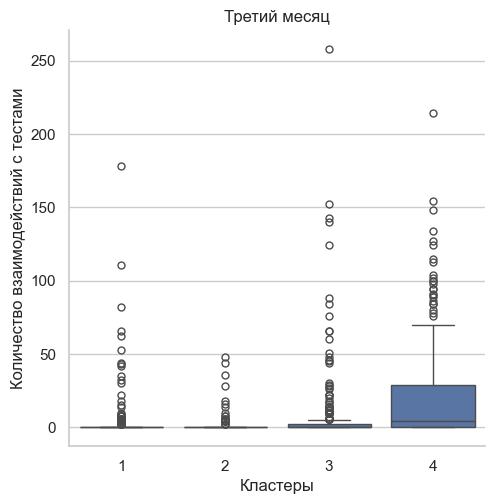

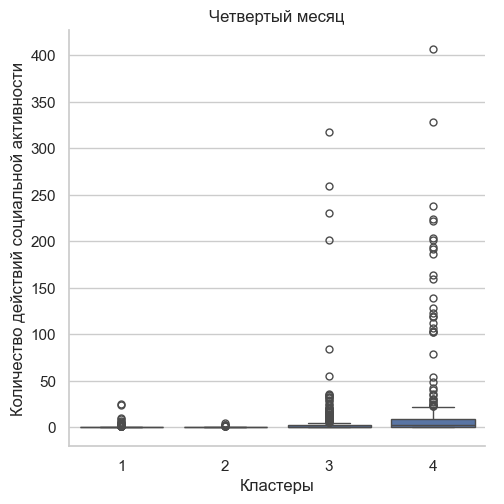

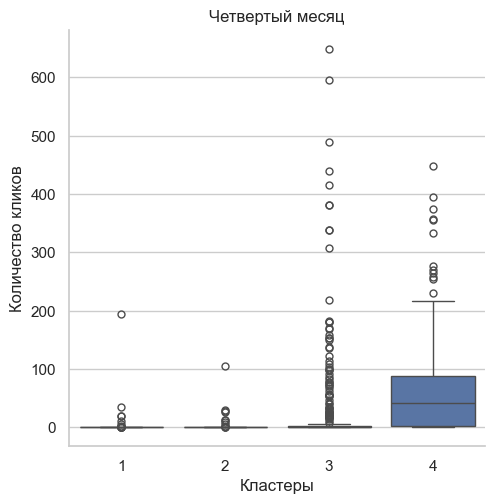

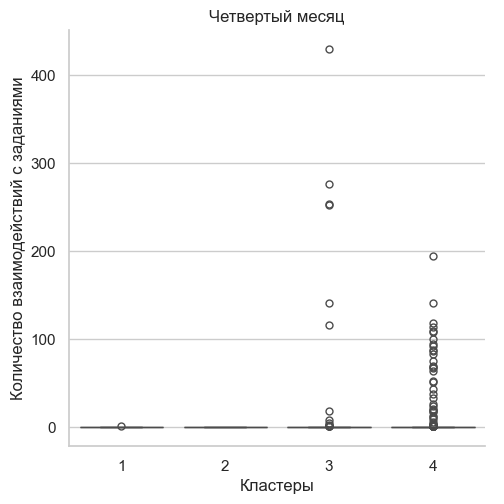

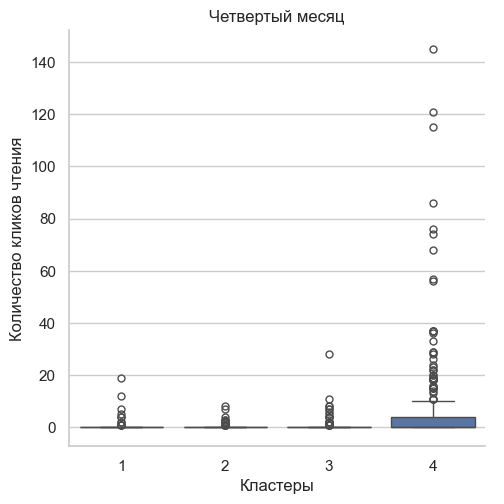

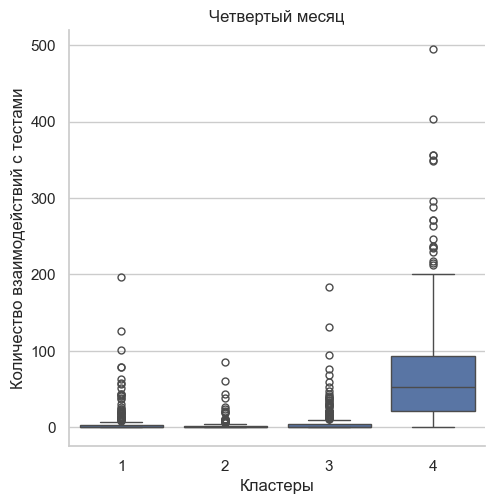

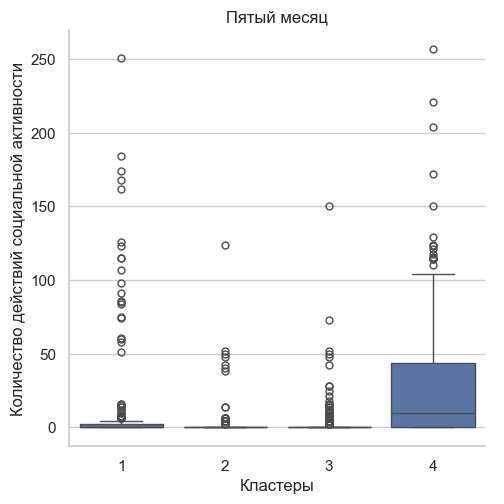

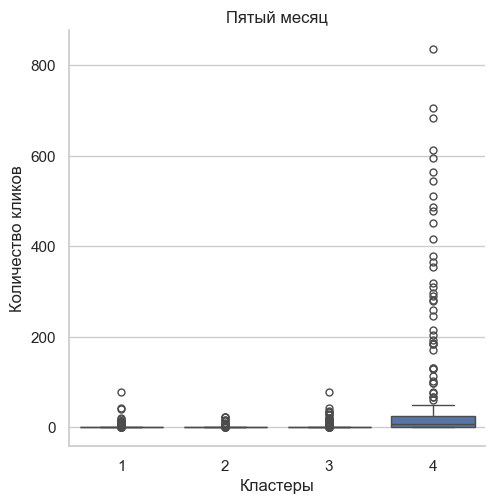

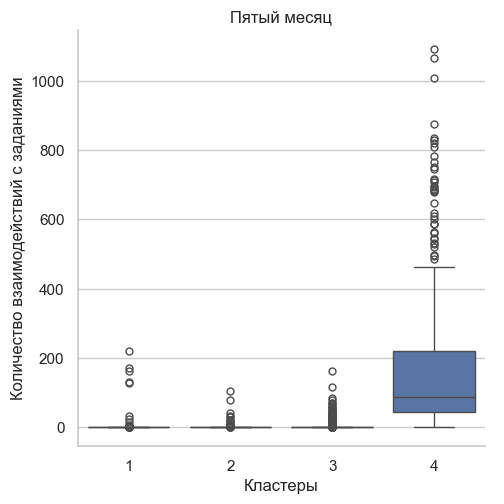

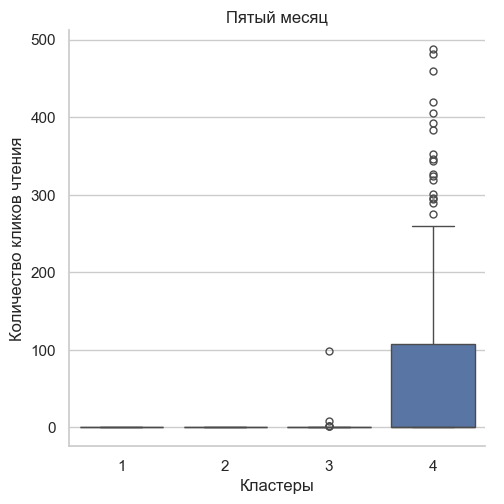

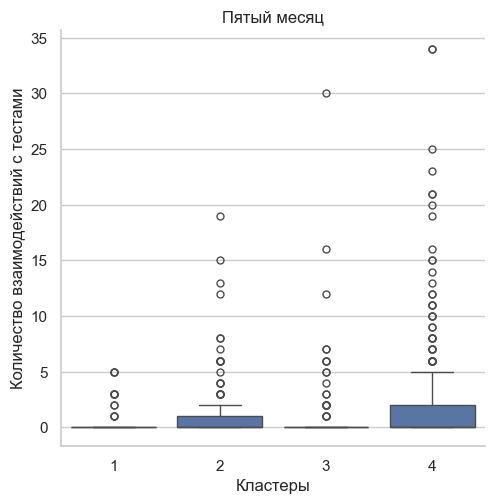

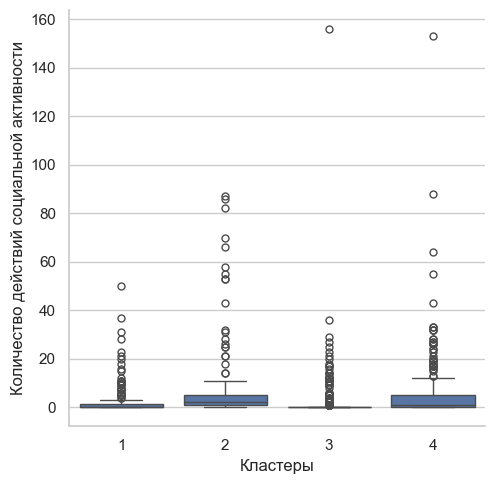

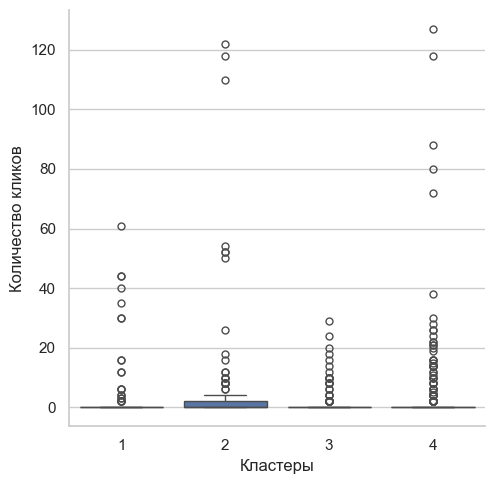

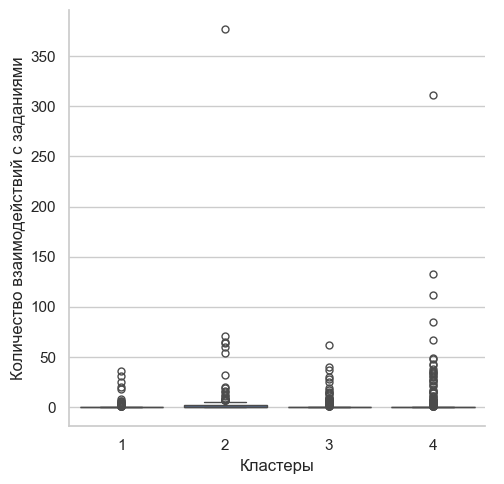

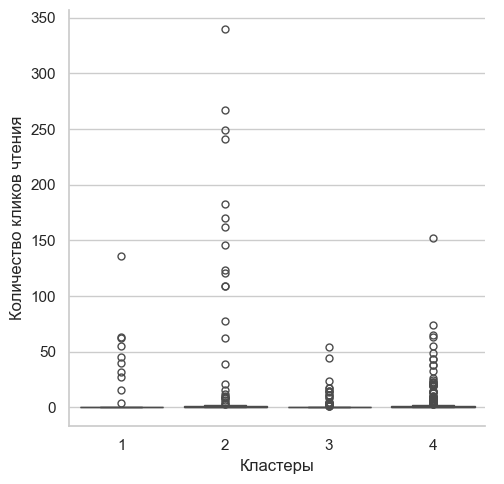

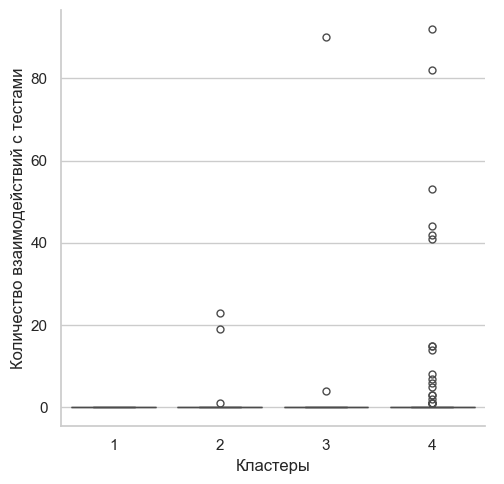

In [64]:
for k in range(len(cols)):
    g = sns.catplot(data=df_1, x='icluster4', y=cols[k],  kind='box')
    if k % 5 == 0:
        g.set_axis_labels('Кластеры', 'Количество действий социальной активности')
    elif k % 5 == 1:
        g.set_axis_labels('Кластеры', 'Количество кликов')
    elif k % 5 == 2:
        g.set_axis_labels('Кластеры', 'Количество взаимодействий с заданиями')
    elif k % 5 == 3:
        g.set_axis_labels('Кластеры', 'Количество кликов чтения')
    elif k % 5 == 4:
        g.set_axis_labels('Кластеры', 'Количество взаимодействий с тестами')
    if k == 0 or k == 1 or k == 2 or k == 3 or k == 4:
        g.set(title = 'Первый месяц')
    elif k // 5 == 1:
        g.set(title = 'Второй месяц')
    elif k // 5 == 2:
        g.set(title = 'Третий месяц')
    elif k // 5 == 3:
        g.set(title = 'Четвертый месяц')
    elif k // 5 == 4:
        g.set(title = 'Пятый месяц')
    
    g.set_xticklabels(['1', '2', '3', '4'])

#### Диаграммы размаха для 2 семестра

In [66]:
df_2['icluster4'].value_counts()

icluster4
1    317
0    180
3    155
2     53
Name: count, dtype: int64

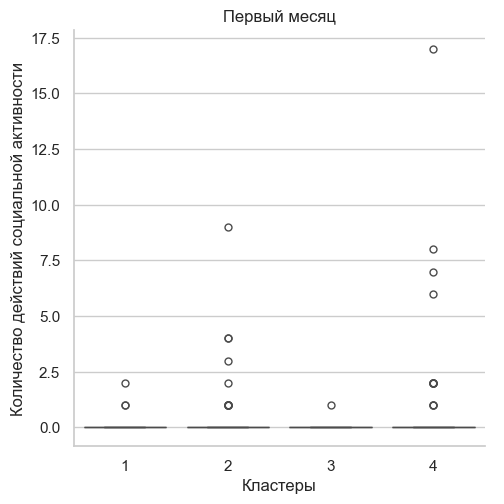

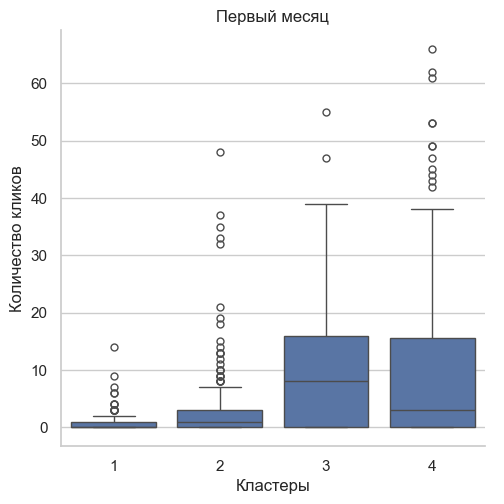

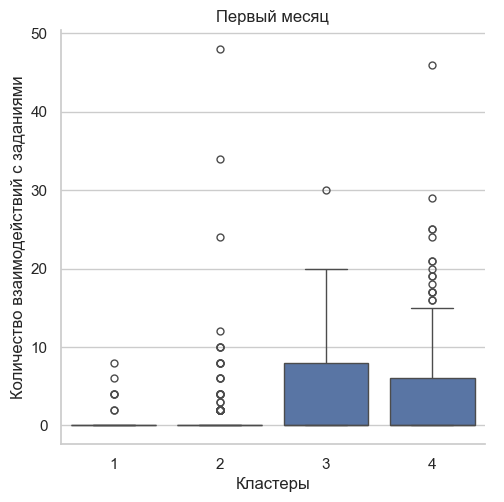

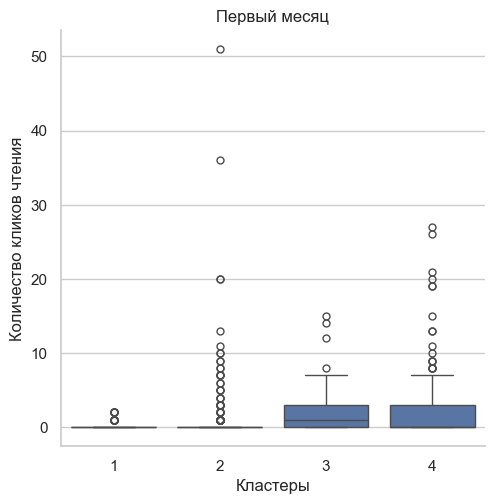

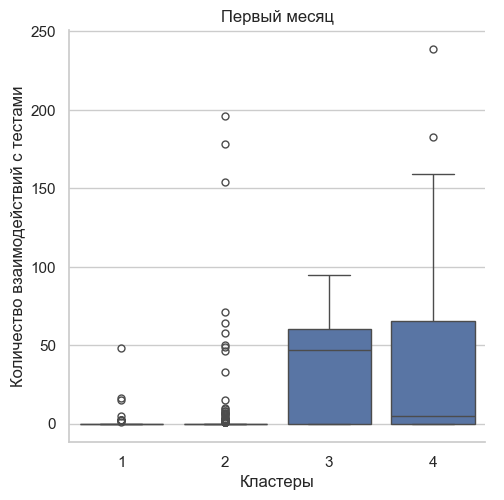

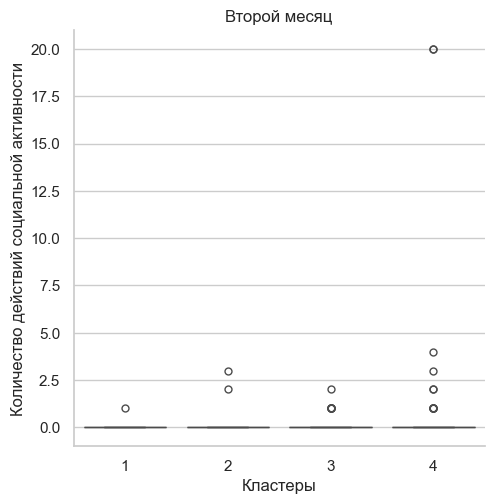

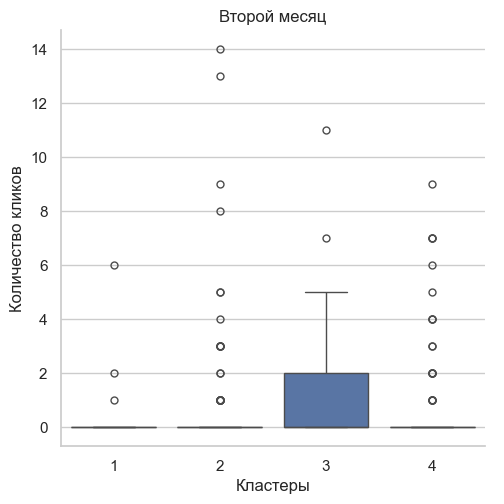

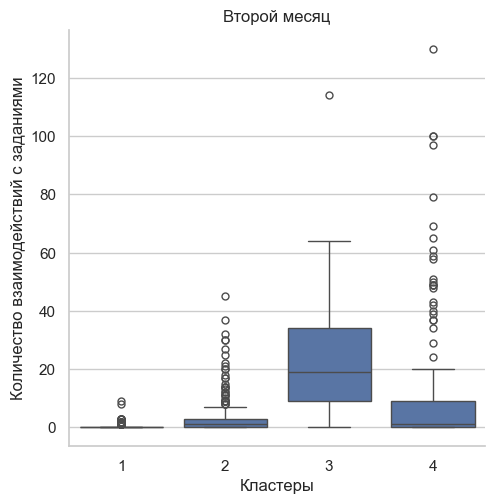

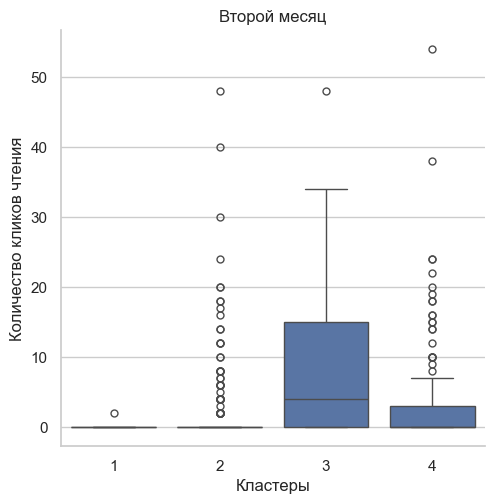

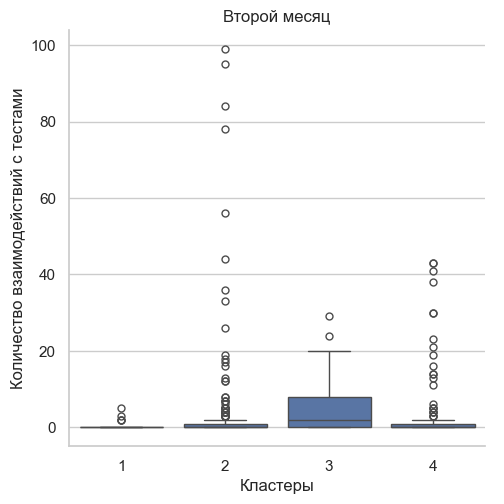

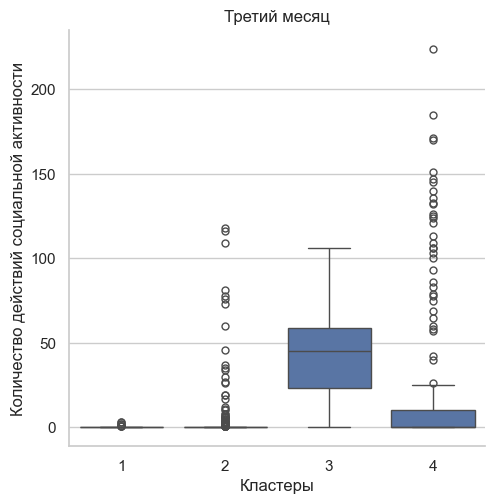

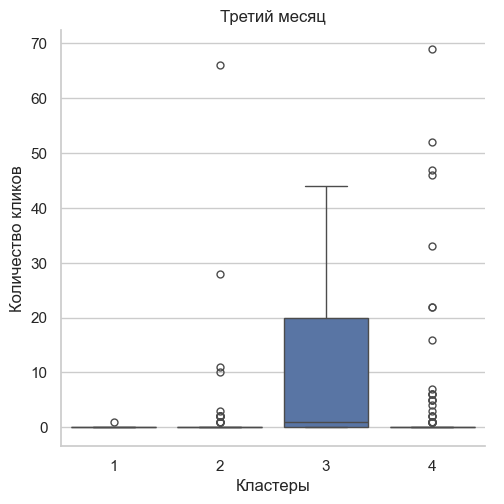

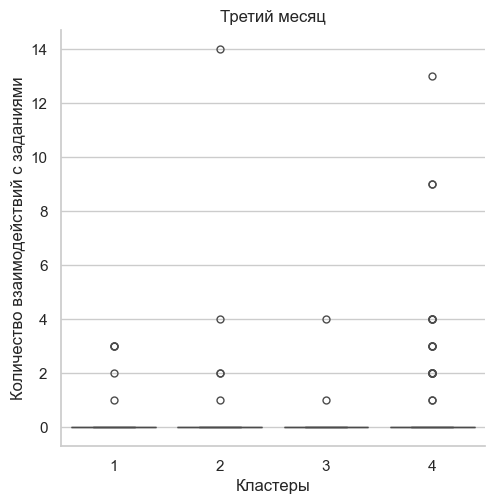

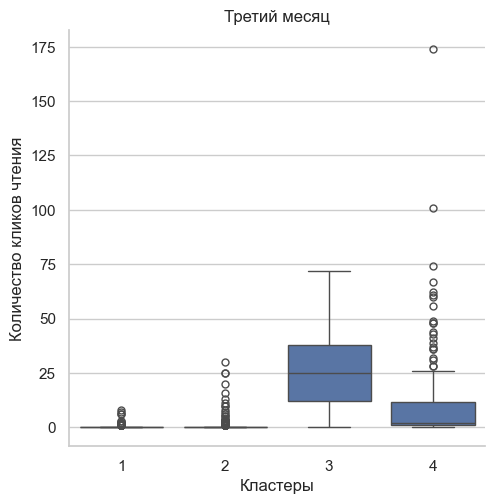

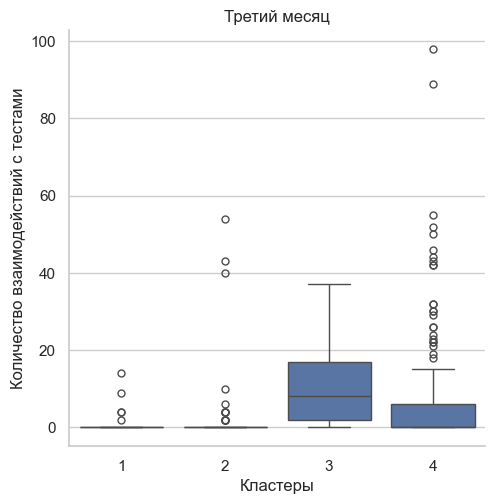

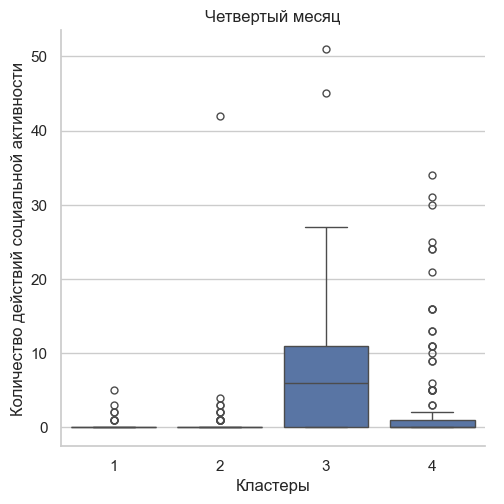

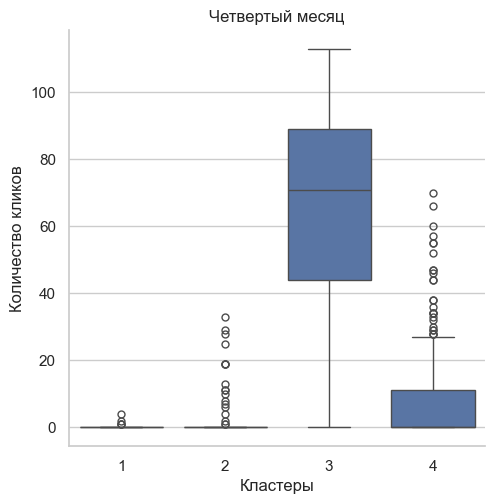

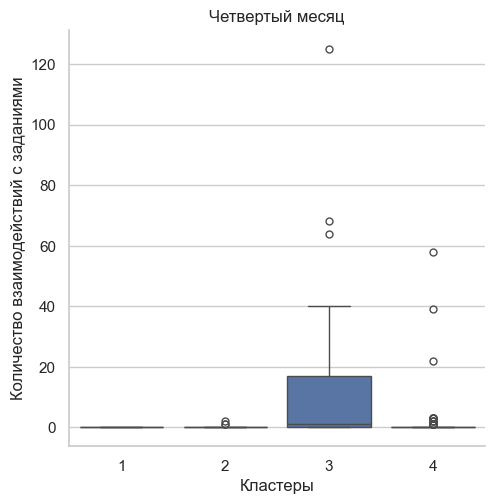

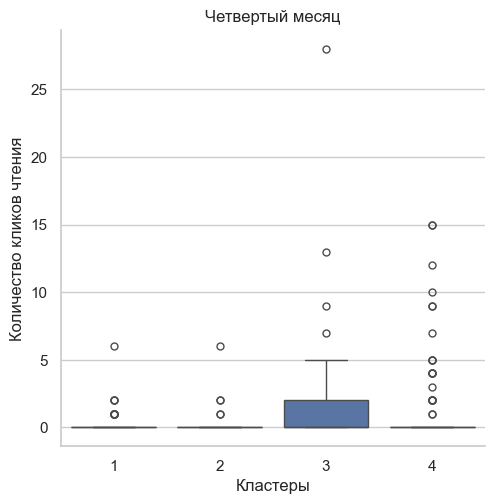

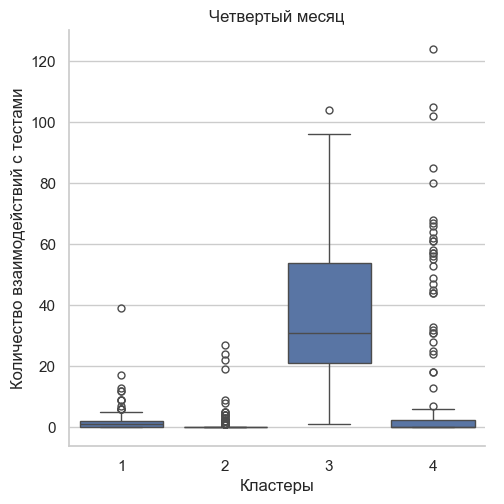

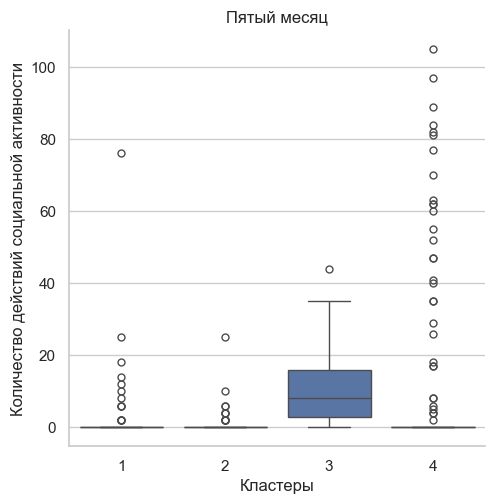

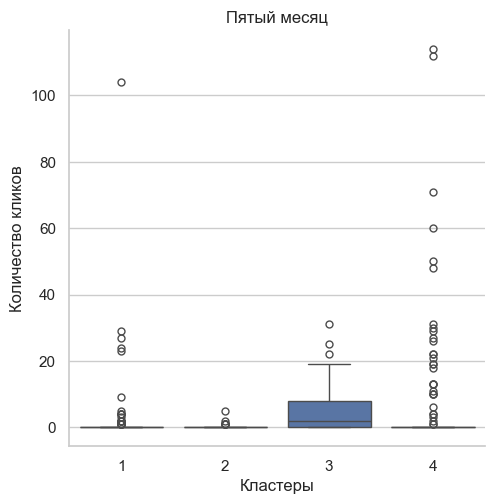

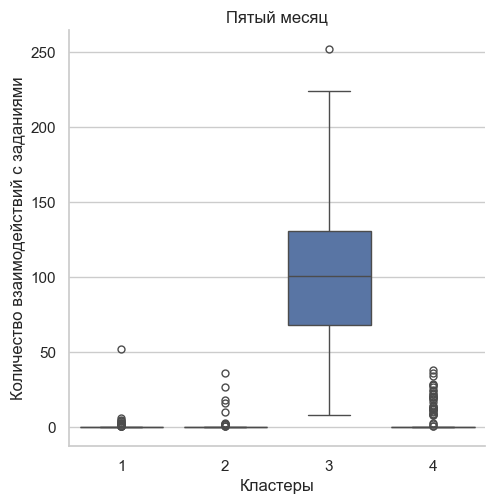

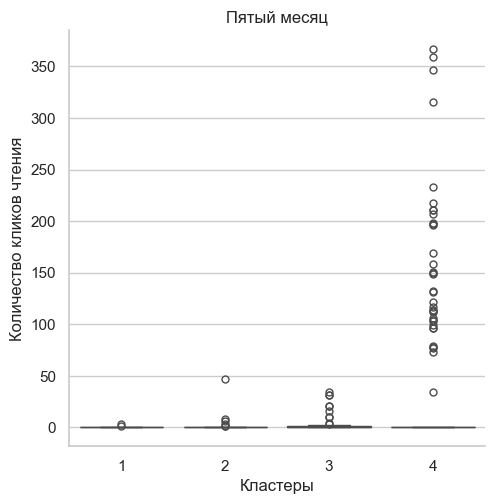

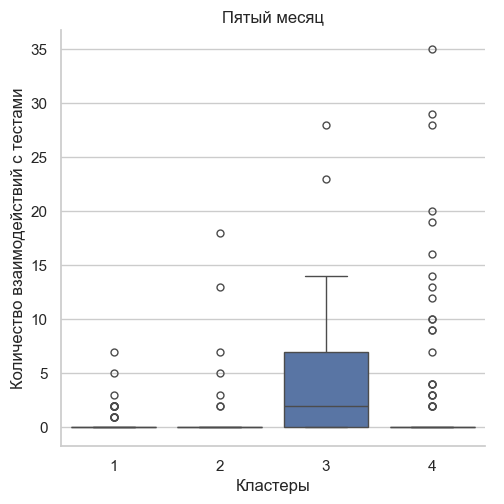

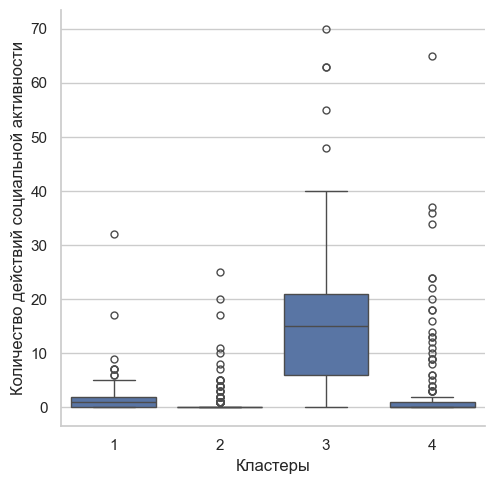

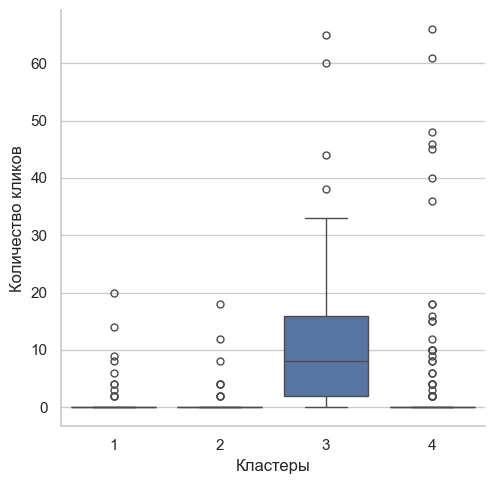

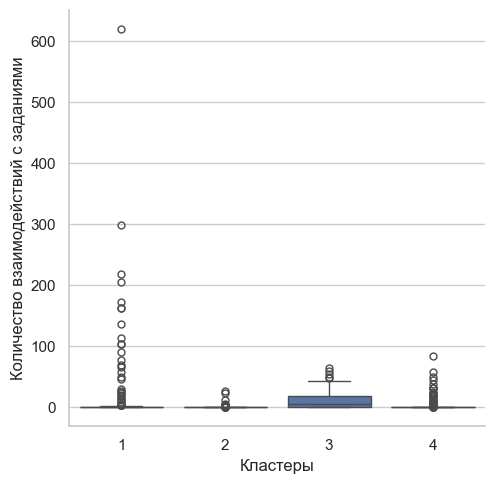

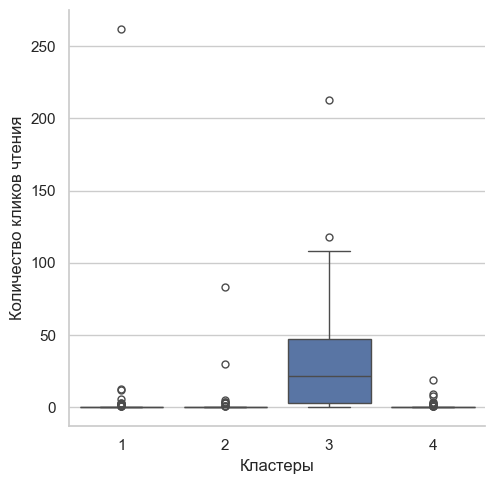

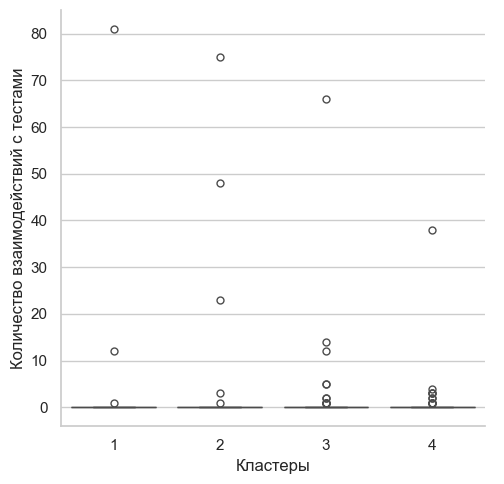

In [67]:
for k in range(len(cols)):
    g = sns.catplot(data=df_2, x='icluster4', y=cols[k],  kind='box')
    if k % 5 == 0:
        g.set_axis_labels('Кластеры', 'Количество действий социальной активности')
    elif k % 5 == 1:
        g.set_axis_labels('Кластеры', 'Количество кликов')
    elif k % 5 == 2:
        g.set_axis_labels('Кластеры', 'Количество взаимодействий с заданиями')
    elif k % 5 == 3:
        g.set_axis_labels('Кластеры', 'Количество кликов чтения')
    elif k % 5 == 4:
        g.set_axis_labels('Кластеры', 'Количество взаимодействий с тестами')
    if k == 0 or k == 1 or k == 2 or k == 3 or k == 4:
        g.set(title = 'Первый месяц')
    elif k // 5 == 1:
        g.set(title = 'Второй месяц')
    elif k // 5 == 2:
        g.set(title = 'Третий месяц')
    elif k // 5 == 3:
        g.set(title = 'Четвертый месяц')
    elif k // 5 == 4:
        g.set(title = 'Пятый месяц')
    
    g.set_xticklabels(['1', '2', '3', '4'])

## Часть 3. Качественный подход - подготовка

#### Импорт библиотек

In [70]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler

In [71]:
time_delta = dt.timedelta(minutes=10)
print(time_delta)

0:10:00


#### Загрузка данных

In [73]:
sem1 = semestr1.drop(['num_of_mes', 'semestr', 'year', 'month'], axis=1)
sem2 = semestr2.drop(['num_of_mes', 'semestr', 'year', 'month'], axis=1)

In [74]:
print('sem1:', sem1.isna().sum(), sep='\n')
print('sem2:', sem2.isna().sum(), sep='\n')

sem1:
date_of_action    0
name              0
type              0
dtype: int64
sem2:
date_of_action    0
name              0
type              0
dtype: int64


In [75]:
df1=pd.DataFrame(sem1['name'].unique(), columns=['name'])
df2=pd.DataFrame(sem2['name'].unique(), columns=['name'])
df1.insert(1, 'number_of_sess', 0)
df1.insert(2, 'average_len', 0)
df1.insert(3, 'average_actions', 0)
df2.insert(1, 'number_of_sess', 0)
df2.insert(2, 'average_len', 0)
df2.insert(3, 'average_actions', 0)

#### Выделение учебных сессий среди логов

In [77]:
sessions1 = []
for name in sem1['name'].unique().tolist():
    data = sem1[sem1['name'] == name].sort_values(by='date_of_action')
    data.index = range(len(data.index))
    sess = []
    ins = [0]
    for i in range(1, len(data.index)):
        delta = data.loc[i, 'date_of_action'] - data.loc[i-1, 'date_of_action']
        if delta > time_delta: ins.append(i)
    ins.append(len(data.index))
    for i in range(len(ins)-1):
        sess.append(data[ins[i]:ins[i+1]])
    sessions1.append(sess)

sessions2 = []
for name in sem2['name'].unique().tolist():
    data = sem2[sem2['name'] == name].sort_values(by='date_of_action')
    data.index = range(len(data.index))
    sess = []
    ins = [0]
    for i in range(1, len(data.index)):
        delta = data.loc[i, 'date_of_action'] - data.loc[i-1, 'date_of_action']
        if delta > time_delta: ins.append(i)
    ins.append(len(data.index))
    for i in range(len(ins)-1):
        sess.append(data[ins[i]:ins[i+1]])
    sessions2.append(sess)

#### Формирование таблицы количественных характеристик активности студентов

In [79]:
# i-индекс в датасете sessions, j-индекс в датасете df
for i in range(len(sessions1)):
    j = df1[df1['name'] == sessions1[i][0]['name'].unique()[0]].index[0]
    average_len = dt.timedelta()
    number_of_sess = len(sessions1[i])
    average_actions = 0
    reading = 0
    test = 0
    training = 0
    exercise = 0
    reading_test = 0
    test_reading = 0
    reading_exercise = 0
    exercise_reading = 0
    test_exercise = 0
    exercise_test = 0
    training_reading = 0
    reading_training = 0
    training_test = 0
    test_training = 0
    training_exercise = 0
    exercise_training = 0
    for k in range(number_of_sess):
        len_sess = sessions1[i][k]['date_of_action'].iloc[-1] - sessions1[i][k]['date_of_action'].iloc[0]
        average_len += len_sess
        average_actions += sessions1[i][k].shape[0]
        for p in range(1, len(sessions1[i][k].index)):
            if sessions1[i][k].loc[sessions1[i][k].index[p], 'type'] == 'reading':
                if sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'reading': reading += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'test': reading_test += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'exercise': reading_exercise += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'training': reading_training += 1
            elif sessions1[i][k].loc[sessions1[i][k].index[p], 'type'] == 'test':
                if sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'reading': test_reading += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'test': test += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'exercise': test_exercise += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'training': test_training += 1
            elif sessions1[i][k].loc[sessions1[i][k].index[p], 'type'] == 'exercise':
                if sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'reading': exercise_reading += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'test': exercise_test += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'exercise': exercise += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'training': exercise_training += 1
            elif sessions1[i][k].loc[sessions1[i][k].index[p], 'type'] == 'training':
                if sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'reading': training_reading += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'test': training_test += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'exercise': training_exercise += 1
                elif sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] == 'training': training += 1
    average_len = average_len / number_of_sess
    average_len = average_len.seconds
    average_actions = average_actions / number_of_sess
    df1.loc[j, 'number_of_sess'] = number_of_sess
    df1.loc[j, 'average_len'] = int(average_len)
    df1.loc[j, 'average_actions'] = float('{:.3f}'.format(average_actions))
    df1.loc[j, 'reading_reading'] = reading 
    df1.loc[j, 'test_test'] = test
    df1.loc[j, 'exercise_exercise'] = exercise 
    df1.loc[j, 'reading_test'] = reading_test
    df1.loc[j, 'test_reading'] = test_reading
    df1.loc[j, 'reading_exercise'] = reading_exercise
    df1.loc[j, 'exercise_reading'] = exercise_reading 
    df1.loc[j, 'test_exercise'] = test_exercise
    df1.loc[j, 'exercise_test'] = exercise_test
    df1.loc[j, 'training_reading'] = training_reading
    df1.loc[j, 'reading_training'] = reading_training
    df1.loc[j, 'training_test'] = training_test
    df1.loc[j, 'test_training'] = test_training
    df1.loc[j, 'training_exercise'] = training_exercise
    df1.loc[j, 'exercise_training'] = exercise_training

# i-индекс в датасете sessions, j-индекс в датасете df
for i in range(len(sessions2)):
    j = df2[df2['name'] == sessions2[i][0]['name'].unique()[0]].index[0]
    average_len = dt.timedelta()
    number_of_sess = len(sessions2[i])
    average_actions = 0
    reading = 0
    test = 0
    training = 0
    exercise = 0
    reading_test = 0
    test_reading = 0
    reading_exercise = 0
    exercise_reading = 0
    test_exercise = 0
    exercise_test = 0
    training_reading = 0
    reading_training = 0
    training_test = 0
    test_training = 0
    training_exercise = 0
    exercise_training = 0
    for k in range(number_of_sess):
        len_sess = sessions2[i][k]['date_of_action'].iloc[-1] - sessions2[i][k]['date_of_action'].iloc[0]
        average_len += len_sess
        average_actions += sessions2[i][k].shape[0]
        for p in range(1, len(sessions2[i][k].index)):
            if sessions2[i][k].loc[sessions2[i][k].index[p], 'type'] == 'reading':
                if sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'reading': reading += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'test': reading_test += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'exercise': reading_exercise += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'training': reading_training += 1
            elif sessions2[i][k].loc[sessions2[i][k].index[p], 'type'] == 'test':
                if sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'reading': test_reading += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'test': test += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'exercise': test_exercise += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'training': test_training += 1
            elif sessions2[i][k].loc[sessions2[i][k].index[p], 'type'] == 'exercise':
                if sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'reading': exercise_reading += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'test': exercise_test += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'exercise': exercise += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'training': exercise_training += 1
            elif sessions2[i][k].loc[sessions2[i][k].index[p], 'type'] == 'training':
                if sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'reading': training_reading += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'test': training_test += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'exercise': training_exercise += 1
                elif sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] == 'training': training += 1
    average_len = average_len / number_of_sess
    average_len = average_len.seconds
    average_actions = average_actions / number_of_sess
    df2.loc[j, 'number_of_sess'] = number_of_sess
    df2.loc[j, 'average_len'] = int(average_len)
    df2.loc[j, 'average_actions'] = float('{:.3f}'.format(average_actions))
    df2.loc[j, 'reading_reading'] = reading
    df2.loc[j, 'test_test'] = test
    df2.loc[j, 'exercise_exercise'] = exercise
    df2.loc[j, 'reading_test'] = reading_test
    df2.loc[j, 'test_reading'] = test_reading
    df2.loc[j, 'reading_exercise'] = reading_exercise
    df2.loc[j, 'exercise_reading'] = exercise_reading
    df2.loc[j, 'test_exercise'] = test_exercise
    df2.loc[j, 'exercise_test'] = exercise_test
    df2.loc[j, 'training_reading'] = training_reading
    df2.loc[j, 'reading_training'] = reading_training
    df2.loc[j, 'training_test'] = training_test
    df2.loc[j, 'test_training'] = test_training
    df2.loc[j, 'training_exercise'] = training_exercise
    df2.loc[j, 'exercise_training'] = exercise_training

In [80]:
df1.describe()

number_of_sess  average_len  average_actions  reading_reading  \
count      986.000000   986.000000       986.000000       986.000000   
mean        36.795132   166.791075         6.680695        25.876268   
std         48.594652   205.668243         9.015471        99.243713   
min          1.000000     0.000000         1.000000         0.000000   
25%          2.000000     0.000000         2.000000         0.000000   
50%         13.000000   113.000000         4.790500         1.000000   
75%         60.750000   242.500000         7.700500         8.000000   
max        367.000000  1536.000000       136.500000       887.000000   

        test_test  exercise_exercise  reading_test  test_reading  \
count  986.000000         986.000000    986.000000    986.000000   
mean   106.275862          28.184584      2.921907      3.246450   
std    175.443655          58.969530      8.444202      9.060379   
min      0.000000           0.000000      0.000000      0.000000   
25%      0.000000           0.000000      0.000000      0.000000   
50%      2.000000           1.000000      0.000000      0.000000   
75%    171.750000          21.750000      2.000000      2.000000   
max    929.000000         489.000000     90.000000     85.000000   

       reading_exercise  exercise_reading  test_exercise  exercise_test  \
count        986.000000        986.000000     986.000000     986.000000   
mean           1.238337          1.162272       1.265720       1.345842   
std            2.692534          2.532236       2.967229       3.092330   
min            0.000000          0.000000       0.000000       0.000000   
25%            0.000000          0.000000       0.000000       0.000000   
50%            0.000000          0.000000       0.000000       0.000000   
75%            1.000000          1.000000       1.000000       1.000000   
max           26.000000         24.000000      28.000000      28.000000   

       training_reading  reading_training  training_test  test_training  \
count        986.000000        986.000000     986.000000     986.000000   
mean           0.303245          0.302231       0.513185       0.537525   
std            1.524863          1.411316       2.044264       2.322066   
min            0.000000          0.000000       0.000000       0.000000   
25%            0.000000          0.000000       0.000000       0.000000   
50%            0.000000          0.000000       0.000000       0.000000   
75%            0.000000          0.000000       0.000000       0.000000   
max           21.000000         17.000000      23.000000      33.000000   

       training_exercise  exercise_training  
count         986.000000         986.000000  
mean            0.162272           0.161258  
std             0.760735           0.746811  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             0.000000           0.000000  
max            13.000000          11.000000

In [81]:
df2.describe()

number_of_sess  average_len  average_actions  reading_reading  \
count      705.000000   705.000000       705.000000       705.000000   
mean        17.041135   108.246809         4.413159         7.524823   
std         36.565978   207.774965         6.720895        32.426004   
min          1.000000     0.000000         1.000000         0.000000   
25%          1.000000     0.000000         1.333000         0.000000   
50%          3.000000    30.000000         2.545000         0.000000   
75%         10.000000   154.000000         5.579000         2.000000   
max        230.000000  2460.000000        93.500000       579.000000   

        test_test  exercise_exercise  reading_test  test_reading  \
count  705.000000         705.000000    705.000000    705.000000   
mean    30.835461           7.001418      0.568794      0.601418   
std     73.666178          19.996981      1.883282      1.928037   
min      0.000000           0.000000      0.000000      0.000000   
25%      0.000000           0.000000      0.000000      0.000000   
50%      0.000000           0.000000      0.000000      0.000000   
75%      4.000000           2.000000      0.000000      0.000000   
max    359.000000         173.000000     23.000000     26.000000   

       reading_exercise  exercise_reading  test_exercise  exercise_test  \
count        705.000000        705.000000     705.000000     705.000000   
mean           0.439716          0.370213       0.391489       0.448227   
std            1.550150          1.379834       1.128120       1.321995   
min            0.000000          0.000000       0.000000       0.000000   
25%            0.000000          0.000000       0.000000       0.000000   
50%            0.000000          0.000000       0.000000       0.000000   
75%            0.000000          0.000000       0.000000       0.000000   
max           16.000000         13.000000       9.000000      13.000000   

       training_reading  reading_training  training_test  test_training  \
count        705.000000        705.000000     705.000000     705.000000   
mean           0.211348          0.195745       0.303546       0.283688   
std            1.169881          0.996433       1.100775       1.017784   
min            0.000000          0.000000       0.000000       0.000000   
25%            0.000000          0.000000       0.000000       0.000000   
50%            0.000000          0.000000       0.000000       0.000000   
75%            0.000000          0.000000       0.000000       0.000000   
max           15.000000         11.000000      11.000000       9.000000   

       training_exercise  exercise_training  
count         705.000000         705.000000  
mean            0.068085           0.078014  
std             0.346926           0.374449  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           0.000000  
75%             0.000000           0.000000  
max             5.000000           4.000000

### Обработка всех учебных сессий

In [83]:
# выделаем все учебные сессии 1
SEQ_1 = []
for i in range(len(sessions1)):
    j = df1[df1['name'] == sessions1[i][0]['name'].unique()[0]].index[0]
    number_of_sess = len(sessions1[i])
    for k in range(number_of_sess):
        seq = []
        #seq.append(sessions1[i][0]['Полное имя пользователя'].unique()[0])
        seq.append(sessions1[i][k].loc[sessions1[i][k].index[0], 'name'])
        seq.append(sessions1[i][k].loc[sessions1[i][k].index[0], 'type'])
        for p in range(1, len(sessions1[i][k].index)):
            seq.append(sessions1[i][k].loc[sessions1[i][k].index[p], 'type'])
        SEQ_1.append(seq)

DF_FULL_1 = pd.DataFrame(SEQ_1)

# выделаем все учебные сессии 2
SEQ_2 = []
for i in range(len(sessions2)):
    j = df2[df2['name'] == sessions2[i][0]['name'].unique()[0]].index[0]
    number_of_sess = len(sessions2[i])
    for k in range(number_of_sess):
        seq = []
        #seq.append(sessions2[i][0]['Полное имя пользователя'].unique()[0])
        seq.append(sessions2[i][k].loc[sessions2[i][k].index[0], 'name'])
        seq.append(sessions2[i][k].loc[sessions2[i][k].index[0], 'type'])
        for p in range(1, len(sessions2[i][k].index)):
            seq.append(sessions2[i][k].loc[sessions2[i][k].index[p], 'type'])
        SEQ_2.append(seq)

DF_FULL_2 = pd.DataFrame(SEQ_2)

In [84]:
new_seq_1 = []
new_supp_1 = []
for i in range(len(SEQ_1)):
    seq = []
    supp = []
    seq.append(SEQ_1[i][0])
    supp.append(SEQ_1[i][0])
    seq.append(SEQ_1[i][1])
    k = 1
    for j in range(2,len(SEQ_1[i])):
        if (SEQ_1[i][j-1] == SEQ_1[i][j]):
            k += 1
        else:
            seq.append(SEQ_1[i][j])
            supp.append(k)
            k = 1
    supp.append(k)
    new_seq_1.append(seq)
    new_supp_1.append(supp)

new_seq_2 = []
new_supp_2 = []
for i in range(len(SEQ_2)):
    seq = []
    supp = []
    seq.append(SEQ_2[i][0])
    supp.append(SEQ_2[i][0])
    seq.append(SEQ_2[i][1])
    k = 1
    for j in range(2,len(SEQ_2[i])):
        if (SEQ_2[i][j-1] == SEQ_2[i][j]):
            k += 1
        else:
            seq.append(SEQ_2[i][j])
            supp.append(k)
            k = 1
    supp.append(k)
    new_seq_2.append(seq)
    new_supp_2.append(supp)

In [85]:
SEQ_pair_1 = []
for i in range(len(SEQ_1)):
    seq = []
    seq.append(SEQ_1[i][0])
    for j in range(1,len(SEQ_1[i])-1):
        if SEQ_1[i][j] == 'click':
            if SEQ_1[i][j+1] == 'click': seq.append('click-click')
            elif SEQ_1[i][j+1] == 'test': seq.append('click-test')
            elif SEQ_1[i][j+1] == 'training': seq.append('click-training')
            elif SEQ_1[i][j+1] == 'reading': seq.append('click-reading')
            elif SEQ_1[i][j+1] == 'exercise': seq.append('click-exercise')
            else: seq.append('click-activity')
        if SEQ_1[i][j] == 'test':
            if SEQ_1[i][j+1] == 'click': seq.append('test-click')
            elif SEQ_1[i][j+1] == 'test': seq.append('test-test')
            elif SEQ_1[i][j+1] == 'training': seq.append('test-training')
            elif SEQ_1[i][j+1] == 'reading': seq.append('test-reading')
            elif SEQ_1[i][j+1] == 'exercise': seq.append('test-exercise')
            else: seq.append('test-activity')
        if SEQ_1[i][j] == 'training':
            if SEQ_1[i][j+1] == 'click': seq.append('training-click')
            elif SEQ_1[i][j+1] == 'test': seq.append('training-test')
            elif SEQ_1[i][j+1] == 'training': seq.append('training-training')
            elif SEQ_1[i][j+1] == 'reading': seq.append('training-reading')
            elif SEQ_1[i][j+1] == 'exercise': seq.append('training-exercise')
            else: seq.append('training-activity')
        if SEQ_1[i][j] == 'reading':
            if SEQ_1[i][j+1] == 'click': seq.append('reading-click')
            elif SEQ_1[i][j+1] == 'test': seq.append('reading-test')
            elif SEQ_1[i][j+1] == 'training': seq.append('reading-training')
            elif SEQ_1[i][j+1] == 'reading': seq.append('reading-reading')
            elif SEQ_1[i][j+1] == 'exercise': seq.append('reading-exercise')
            else: seq.append('reading-activity')
        if SEQ_1[i][j] == 'exercise':
            if SEQ_1[i][j+1] == 'click': seq.append('exercise-click')
            elif SEQ_1[i][j+1] == 'test': seq.append('exercise-test')
            elif SEQ_1[i][j+1] == 'training': seq.append('exercise-training')
            elif SEQ_1[i][j+1] == 'reading': seq.append('exercise-reading')
            elif SEQ_1[i][j+1] == 'exercise': seq.append('exercise-exercise')
            else: seq.append('exercise-activity')
        if SEQ_1[i][j] == 'activity':
            if SEQ_1[i][j+1] == 'click': seq.append('activity-click')
            elif SEQ_1[i][j+1] == 'test': seq.append('activity-test')
            elif SEQ_1[i][j+1] == 'training': seq.append('activity-training')
            elif SEQ_1[i][j+1] == 'reading': seq.append('activity-reading')
            elif SEQ_1[i][j+1] == 'exercise': seq.append('activity-exercise')
            else: seq.append('activity-activity')
    SEQ_pair_1.append(seq)

SEQ_pair_2 = []
for i in range(len(SEQ_2)):
    seq = []
    seq.append(SEQ_2[i][0])
    for j in range(1,len(SEQ_2[i])-1):
        if SEQ_2[i][j] == 'click':
            if SEQ_2[i][j+1] == 'click': seq.append('click-click')
            elif SEQ_2[i][j+1] == 'test': seq.append('click-test')
            elif SEQ_2[i][j+1] == 'training': seq.append('click-training')
            elif SEQ_2[i][j+1] == 'reading': seq.append('click-reading')
            elif SEQ_2[i][j+1] == 'exercise': seq.append('click-exercise')
            else: seq.append('click-activity')
        if SEQ_2[i][j] == 'test':
            if SEQ_2[i][j+1] == 'click': seq.append('test-click')
            elif SEQ_2[i][j+1] == 'test': seq.append('test-test')
            elif SEQ_2[i][j+1] == 'training': seq.append('test-training')
            elif SEQ_2[i][j+1] == 'reading': seq.append('test-reading')
            elif SEQ_2[i][j+1] == 'exercise': seq.append('test-exercise')
            else: seq.append('test-activity')
        if SEQ_2[i][j] == 'training':
            if SEQ_2[i][j+1] == 'click': seq.append('training-click')
            elif SEQ_2[i][j+1] == 'test': seq.append('training-test')
            elif SEQ_2[i][j+1] == 'training': seq.append('training-training')
            elif SEQ_2[i][j+1] == 'reading': seq.append('training-reading')
            elif SEQ_2[i][j+1] == 'exercise': seq.append('training-exercise')
            else: seq.append('training-activity')
        if SEQ_2[i][j] == 'reading':
            if SEQ_2[i][j+1] == 'click': seq.append('reading-click')
            elif SEQ_2[i][j+1] == 'test': seq.append('reading-test')
            elif SEQ_2[i][j+1] == 'training': seq.append('reading-training')
            elif SEQ_2[i][j+1] == 'reading': seq.append('reading-reading')
            elif SEQ_2[i][j+1] == 'exercise': seq.append('reading-exercise')
            else: seq.append('reading-activity')
        if SEQ_2[i][j] == 'exercise':
            if SEQ_2[i][j+1] == 'click': seq.append('exercise-click')
            elif SEQ_2[i][j+1] == 'test': seq.append('exercise-test')
            elif SEQ_2[i][j+1] == 'training': seq.append('exercise-training')
            elif SEQ_2[i][j+1] == 'reading': seq.append('exercise-reading')
            elif SEQ_2[i][j+1] == 'exercise': seq.append('exercise-exercise')
            else: seq.append('exercise-activity')
        if SEQ_2[i][j] == 'activity':
            if SEQ_2[i][j+1] == 'click': seq.append('activity-click')
            elif SEQ_2[i][j+1] == 'test': seq.append('activity-test')
            elif SEQ_2[i][j+1] == 'training': seq.append('activity-training')
            elif SEQ_2[i][j+1] == 'reading': seq.append('activity-reading')
            elif SEQ_2[i][j+1] == 'exercise': seq.append('activity-exercise')
            else: seq.append('activity-activity')
    SEQ_pair_2.append(seq)

In [86]:
new_seq_pair_1 = []
new_supp_pair_1 = []
for i in range(len(SEQ_pair_1)):
    if len(SEQ_pair_1[i]) > 1:
        seq_pair = []
        supp_pair = []
        seq_pair.append(SEQ_pair_1[i][0])
        supp_pair.append(SEQ_pair_1[i][0])
        seq_pair.append(SEQ_pair_1[i][1])
        k = 1
        for j in range(2,len(SEQ_pair_1[i])):
            if (SEQ_pair_1[i][j-1] == SEQ_pair_1[i][j]):
                k += 1
            else:
                seq_pair.append(SEQ_1[i][j])
                supp_pair.append(k)
                k = 1
        supp_pair.append(k)
        new_seq_pair_1.append(seq_pair)
        new_supp_pair_1.append(supp_pair)

new_seq_pair_2 = []
new_supp_pair_2 = []
for i in range(len(SEQ_pair_2)):
    if len(SEQ_pair_2[i]) > 1:
        seq_pair = []
        supp_pair = []
        seq_pair.append(SEQ_pair_2[i][0])
        supp_pair.append(SEQ_pair_2[i][0])
        seq_pair.append(SEQ_pair_2[i][1])
        k = 1
        for j in range(2,len(SEQ_pair_2[i])):
            if (SEQ_pair_2[i][j-1] == SEQ_pair_2[i][j]):
                k += 1
            else:
                seq_pair.append(SEQ_2[i][j])
                supp_pair.append(k)
                k = 1
        supp_pair.append(k)
        new_seq_pair_2.append(seq_pair)
        new_supp_pair_2.append(supp_pair)

In [87]:
Series = []
for i in range(1,len(DF_FULL_1.columns)):
    Series.append(pd.DataFrame(DF_FULL_1[i].value_counts()))
DF_FULL_SESSIONS_1 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_1.index = range(len(DF_FULL_SESSIONS_1))

Series = []
for i in range(1,len(DF_FULL_2.columns)):
    Series.append(pd.DataFrame(DF_FULL_2[i].value_counts()))
DF_FULL_SESSIONS_2 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_2.index = range(len(DF_FULL_SESSIONS_2))
DF_FULL_SESSIONS_1

click     test  exercise  reading  training  activity
0     21882.0   7449.0    3233.0   2771.0     489.0     456.0
1      7291.0  10128.0    5961.0   4067.0     644.0     777.0
2      4096.0   9192.0    5567.0   2468.0     629.0     722.0
3      3243.0   7128.0    3680.0   1975.0     578.0     528.0
4      2243.0   6006.0    3070.0   1535.0     551.0     389.0
...       ...      ...       ...      ...       ...       ...
1229      0.0      1.0       0.0      0.0       0.0       0.0
1230      0.0      1.0       0.0      0.0       0.0       0.0
1231      0.0      1.0       0.0      0.0       0.0       0.0
1232      0.0      1.0       0.0      0.0       0.0       0.0
1233      0.0      1.0       0.0      0.0       0.0       0.0

[1234 rows x 6 columns]

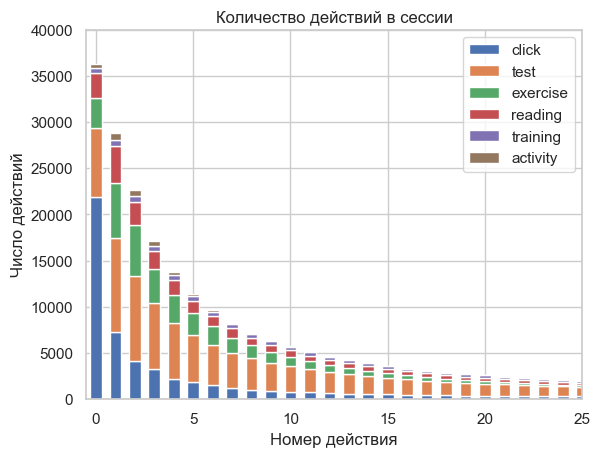

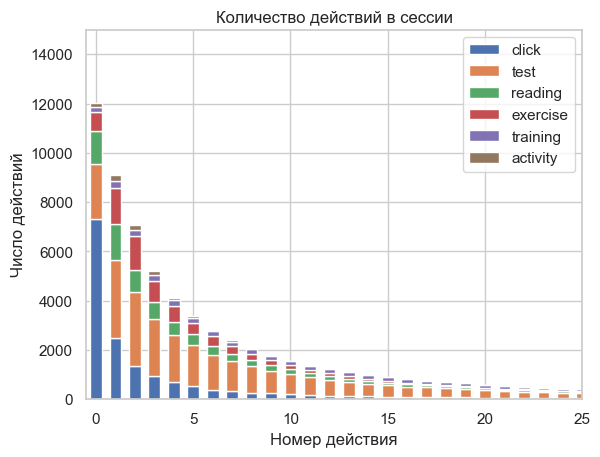

In [88]:
import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_1.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_1.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_1[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_1[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии')
ax.set(xlim = (-0.5,25), ylim = (0,40000), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_2.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_2.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_2[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_2[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии')
ax.set(xlim = (-0.5,25), ylim = (0,15000), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

### Выявление всех возможных последовательностей

In [90]:
# убираем обычные клики и дубликаты
SEQ0_1 = []
for i in range(len(sessions1)):
    j = df1[df1['name'] == sessions1[i][0]['name'].unique()[0]].index[0]
    number_of_sess = len(sessions1[i])
    for k in range(number_of_sess):
        seq = []
        seq.append(sessions1[i][k].loc[sessions1[i][k].index[0], 'name'])
        if sessions1[i][k].loc[sessions1[i][k].index[0], 'type'] != 'click':
            seq.append(sessions1[i][k].loc[sessions1[i][k].index[0], 'type'])
        for p in range(1, len(sessions1[i][k].index)):
            if (sessions1[i][k].loc[sessions1[i][k].index[p], 'type'] != sessions1[i][k].loc[sessions1[i][k].index[p-1], 'type'] 
                and sessions1[i][k].loc[sessions1[i][k].index[p], 'type'] != 'click'):
                seq.append(sessions1[i][k].loc[sessions1[i][k].index[p], 'type'])
        SEQ0_1.append(seq)

# убираем обычные клики и дубликаты
SEQ0_2 = []
for i in range(len(sessions2)):
    j = df2[df2['name'] == sessions2[i][0]['name'].unique()[0]].index[0]
    number_of_sess = len(sessions2[i])
    for k in range(number_of_sess):
        seq = []
        seq.append(sessions2[i][k].loc[sessions2[i][k].index[0], 'name'])
        if sessions2[i][k].loc[sessions2[i][k].index[0], 'type'] != 'click':
            seq.append(sessions2[i][k].loc[sessions2[i][k].index[0], 'type'])
        for p in range(1, len(sessions2[i][k].index)):
            if (sessions2[i][k].loc[sessions2[i][k].index[p], 'type'] != sessions2[i][k].loc[sessions2[i][k].index[p-1], 'type'] 
                and sessions2[i][k].loc[sessions2[i][k].index[p], 'type'] != 'click'):
                seq.append(sessions2[i][k].loc[sessions2[i][k].index[p], 'type'])
        SEQ0_2.append(seq)

In [91]:
SEQ1_1 = []
for i in range(len(SEQ0_1)):
    seq = []
    for j in range(len(SEQ0_1[i])):
        if (j ==0): 
            seq.append(SEQ0_1[i][j])
        else:
            if (SEQ0_1[i][j] != SEQ0_1[i][j-1]): seq.append(SEQ0_1[i][j])
    SEQ1_1.append(seq)

SEQ1_2 = []
for i in range(len(SEQ0_2)):
    seq = []
    for j in range(len(SEQ0_2[i])):
        if (j ==0): 
            seq.append(SEQ0_2[i][j])
        else:
            if (SEQ0_2[i][j] != SEQ0_2[i][j-1]): seq.append(SEQ0_2[i][j])
    SEQ1_2.append(seq)

In [92]:
SEQ2_1 = []
for c in [['reading'], ['exercise'], ['test'], ['training'], ['activity']]:
    SEQ2_1.append(c)
for i in range(len(SEQ1_1)):
    seq = []
    for j in range(2, len(SEQ1_1[i])): 
        seq.append(SEQ1_1[i][j-1] + '-' + SEQ1_1[i][j])
    SEQ2_1.append(seq)

SEQ2_2 = []
for c in [['reading'], ['exercise'], ['test'], ['training'], ['activity']]:
    SEQ2_2.append(c)
for i in range(len(SEQ1_2)):
    seq = []
    for j in range(2, len(SEQ1_2[i])): 
        seq.append(SEQ1_2[i][j-1] + '-' + SEQ1_2[i][j])
    SEQ2_2.append(seq)
SEQ2_1

[['reading'],
 ['exercise'],
 ['test'],
 ['training'],
 ['activity'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['test-activity'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['activity-exercise', 'exercise-reading'],
 ['test-exercise', 'exercise-reading'],
 [],
 [],
 ['activity-exercise', 'exercise-reading'],
 [],
 ['reading-activity'],
 [],
 [],
 [],
 ['activity-exercise'],
 [],
 [],
 [],
 ['exercise-activity'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['activity-exercise', 'exercise-activity', 'activity-exercise'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['activity-reading', 'reading-exercise', 'exercise-reading'],
 [],
 [],
 [],
 [],
 [],
 ['reading-activity'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['exercise-reading'],
 [],
 [],
 [],
 ['activity-exercise'],
 [],
 [],
 [],
 ['acti

In [93]:
SEQ3_1 = []
for i in range(len(SEQ2_1)):
    seq = []
    for j in range(len(SEQ2_1[i])):
        if (SEQ2_1[i][j] == 'exercise-reading'): SEQ2_1[i][j] = 'reading-exercise'
        if (SEQ2_1[i][j] == 'test-reading'): SEQ2_1[i][j] = 'reading-test'
        if (SEQ2_1[i][j] == 'training-reading'): SEQ2_1[i][j] = 'reading-training'
        if (SEQ2_1[i][j] == 'activity-reading'): SEQ2_1[i][j] = 'reading-activity'
            
        if (SEQ2_1[i][j] == 'exercise-test'): SEQ2_1[i][j] = 'test-exercise'
        if (SEQ2_1[i][j] == 'training-test'): SEQ2_1[i][j] = 'test-training'
        if (SEQ2_1[i][j] == 'activity-test'): SEQ2_1[i][j] = 'test-activity'
        
        if (SEQ2_1[i][j] == 'exercise-training'): SEQ2_1[i][j] = 'training-exercise'
        if (SEQ2_1[i][j] == 'activity-training'): SEQ2_1[i][j] = 'training-activity'
        
        if (SEQ2_1[i][j] == 'activity-exercise'): SEQ2_1[i][j] = 'exercise-activity'
        
        if (j ==0): 
            seq.append(SEQ2_1[i][j])
        else:
            if (SEQ2_1[i][j] != SEQ2_1[i][j-1]): seq.append(SEQ2_1[i][j])
    SEQ3_1.append(seq)

SEQ3_2 = []
for i in range(len(SEQ2_2)):
    seq = []
    for j in range(len(SEQ2_2[i])):
        if (SEQ2_2[i][j] == 'exercise-reading'): SEQ2_2[i][j] = 'reading-exercise'
        if (SEQ2_2[i][j] == 'test-reading'): SEQ2_2[i][j] = 'reading-test'
        if (SEQ2_2[i][j] == 'training-reading'): SEQ2_2[i][j] = 'reading-training'
        if (SEQ2_2[i][j] == 'activity-reading'): SEQ2_2[i][j] = 'reading-activity'
            
        if (SEQ2_2[i][j] == 'exercise-test'): SEQ2_2[i][j] = 'test-exercise'
        if (SEQ2_2[i][j] == 'training-test'): SEQ2_2[i][j] = 'test-training'
        if (SEQ2_2[i][j] == 'activity-test'): SEQ2_2[i][j] = 'test-activity'
        
        if (SEQ2_2[i][j] == 'exercise-training'): SEQ2_2[i][j] = 'training-exercise'
        if (SEQ2_2[i][j] == 'activity-training'): SEQ2_2[i][j] = 'training-activity'
        
        if (SEQ2_2[i][j] == 'activity-exercise'): SEQ2_2[i][j] = 'exercise-activity'
        
        if (j ==0): 
            seq.append(SEQ2_2[i][j])
        else:
            if (SEQ2_2[i][j] != SEQ2_2[i][j-1]): seq.append(SEQ2_2[i][j])
    SEQ3_2.append(seq)

In [94]:
DF_UNIQUE_1 = pd.DataFrame(SEQ3_1).drop_duplicates()
DF_UNIQUE_1 = DF_UNIQUE_1.dropna(axis=0, how='all')

DF_UNIQUE_2 = pd.DataFrame(SEQ3_2).drop_duplicates()
DF_UNIQUE_2 = DF_UNIQUE_2.dropna(axis=0, how='all')
DF_UNIQUE_1

0                 1                 2   \
0               reading              None              None   
1              exercise              None              None   
2                  test              None              None   
3              training              None              None   
4              activity              None              None   
...                 ...               ...               ...   
36208     test-exercise     test-training  reading-training   
36216      reading-test  reading-training     test-training   
36218  reading-training      reading-test  reading-exercise   
36238  reading-activity  reading-training              None   
36252     test-training      reading-test     test-training   

                      3                 4                  5              6   \
0                   None              None               None           None   
1                   None              None               None           None   
2                   None              None               None           None   
3                   None              None               None           None   
4                   None              None               None           None   
...                  ...               ...                ...            ...   
36208       reading-test     test-exercise  training-exercise  test-training   
36216       reading-test  reading-training       reading-test           None   
36218  training-exercise     test-training       reading-test           None   
36238               None              None               None           None   
36252      test-exercise              None               None           None   

                  7                 8              9                 10  \
0               None              None           None              None   
1               None              None           None              None   
2               None              None           None              None   
3               None              None           None              None   
4               None              None           None              None   
...              ...               ...            ...               ...   
36208  test-exercise  reading-exercise  test-exercise  reading-exercise   
36216           None              None           None              None   
36218           None              None           None              None   
36238           None              None           None              None   
36252           None              None           None              None   

                 11    12    13    14    15    16    17    18    19    20  \
0              None  None  None  None  None  None  None  None  None  None   
1              None  None  None  None  None  None  None  None  None  None   
2              None  None  None  None  None  None  None  None  None  None   
3              None  None  None  None  None  None  None  None  None  None   
4              None  None  None  None  None  None  None  None  None  None   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
36208  reading-test  None  None  None  None  None  None  None  None  None   
36216          None  None  None  None  None  None  None  None  None  None   
36218          None  None  None  None  None  None  None  None  None  None   
36238          None  None  None  None  None  None  None  None  None  None   
36252          None  None  None  None  None  None  None  None  None  None   

         21    22    23    24    25    26    27    28    29    30    31  
0      None  None  None  None  None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  None  None  None  None  
...     ...   ...   ...   ...   .

In [95]:
DF_UNIQUE_1[0].unique()

array(['reading', 'exercise', 'test', 'training', 'activity',
       'test-activity', 'exercise-activity', 'test-exercise',
       'reading-activity', 'reading-exercise', 'reading-test',
       'reading-training', 'test-training', 'training-exercise',
       'training-activity'], dtype=object)

In [96]:
DF_UNIQUE_1.describe()

0             1             2             3             4   \
count            440           425           373           251           174   
unique            15            10            10            10            10   
top     reading-test  reading-test  reading-test  reading-test  reading-test   
freq             119            68            86            59            37   

                  5             6             7                 8   \
count            119            76            48                32   
unique            10             9             9                 7   
top     reading-test  reading-test  reading-test  reading-exercise   
freq              35            16            14                 8   

                   9             10            11             12  \
count              25            18            13              7   
unique              6             6             5              5   
top     test-training  reading-test  reading-test  test-training   
freq                7             7             5              2   

                   13                 14                15                16  \
count               6                  4                 4                 3   
unique              5                  4                 4                 2   
top     test-training  training-exercise  reading-training  reading-exercise   
freq                2                  1                 1                 2   

                   17            18             19                 20  \
count               2             1              1                  1   
unique              2             1              1                  1   
top     test-training  reading-test  test-training  training-exercise   
freq                1             1              1                  1   

                      21            22             23                 24  \
count                  1             1              1                  1   
unique                 1             1              1                  1   
top     reading-exercise  reading-test  test-exercise  training-exercise   
freq                   1             1              1                  1   

                   25            26                27                 28  \
count               1             1                 1                  1   
unique              1             1                 1                  1   
top     test-training  reading-test  reading-training  training-exercise   
freq                1             1                 1                  1   

                   29                 30             31  
count               1                  1              1  
unique              1                  1              1  
top     test-exercise  training-exercise  test-training  
freq                1                  1              1

## Часть 4. Качественный подход - кластеризация

#### Импорт библиотек

In [99]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, v_measure_score, fowlkes_mallows_score
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import scale
sns.set(style='whitegrid')
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [100]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               986 non-null    object 
 1   number_of_sess     986 non-null    int64  
 2   average_len        986 non-null    int64  
 3   average_actions    986 non-null    float64
 4   reading_reading    986 non-null    float64
 5   test_test          986 non-null    float64
 6   exercise_exercise  986 non-null    float64
 7   reading_test       986 non-null    float64
 8   test_reading       986 non-null    float64
 9   reading_exercise   986 non-null    float64
 10  exercise_reading   986 non-null    float64
 11  test_exercise      986 non-null    float64
 12  exercise_test      986 non-null    float64
 13  training_reading   986 non-null    float64
 14  reading_training   986 non-null    float64
 15  training_test      986 non-null    float64
 16  test_training      986 non

### Кластеризация

#### 1 семестр

In [103]:
df11 = df1.drop(['name'], axis=1)
s = 0
n = 20 # количество вычислений статистики Хопкинса
k = 4 # число ближайщих соседей
for i in range(1, n+1):
    #print(hopkins(dff, k))
    s += hopkins(df11, k)
hop = s/n
hop

0.9440390100155798

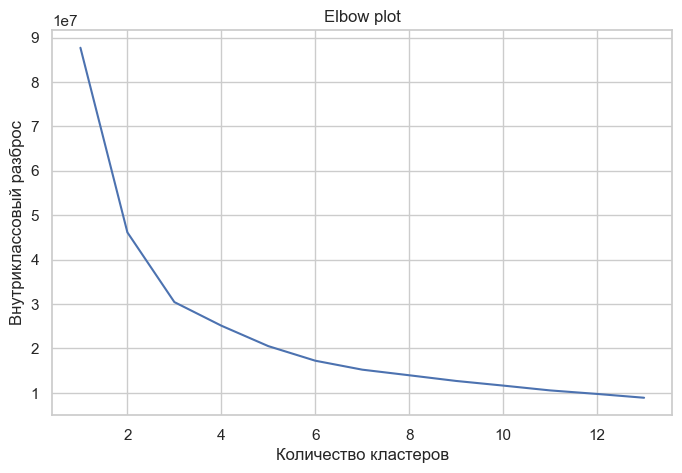

In [104]:
elbow_method(df11)

#### Иерархическая

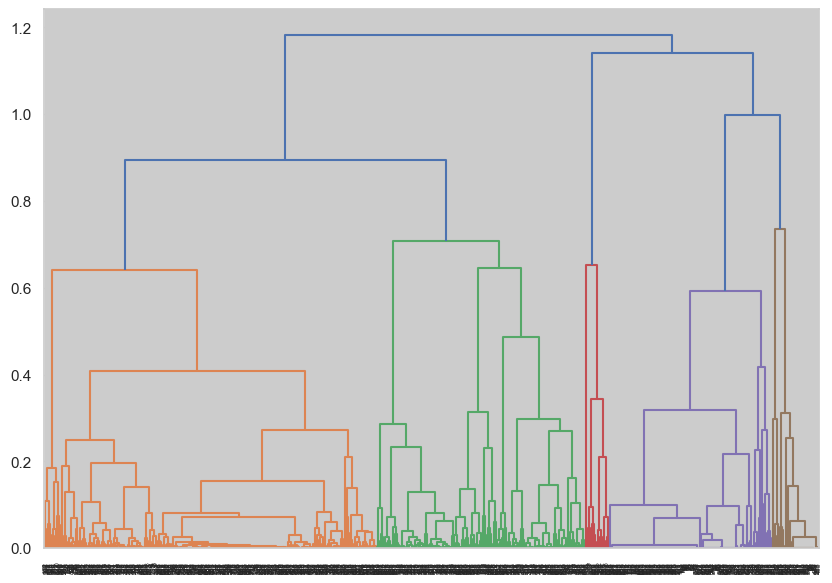

In [106]:
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df11, method='complete', metric='correlation'))

In [107]:
cluster = AgglomerativeClustering(n_clusters=2, metric='correlation', linkage='complete')
df1['icluster2'] = cluster.fit_predict(df11)
cluster = AgglomerativeClustering(n_clusters=4, metric='correlation', linkage='complete')
df1['icluster4'] = cluster.fit_predict(df11)

#### 2 семестр

In [109]:
df12 = df2.drop(['name'], axis=1)
s = 0
n = 20 # количество вычислений статистики Хопкинса
k = 4 # число ближайщих соседей
for i in range(1, n+1):
    #print(hopkins(dff, k))
    s += hopkins(df12, k)
hop = s/n
hop

0.9712833196918353

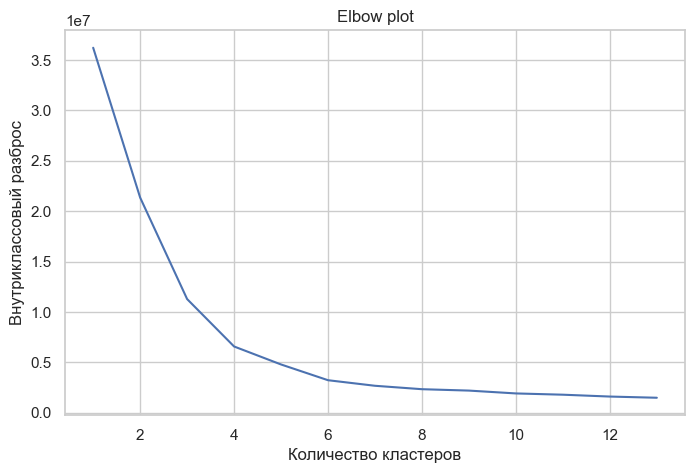

In [110]:
elbow_method(df12)

#### Иерархическая

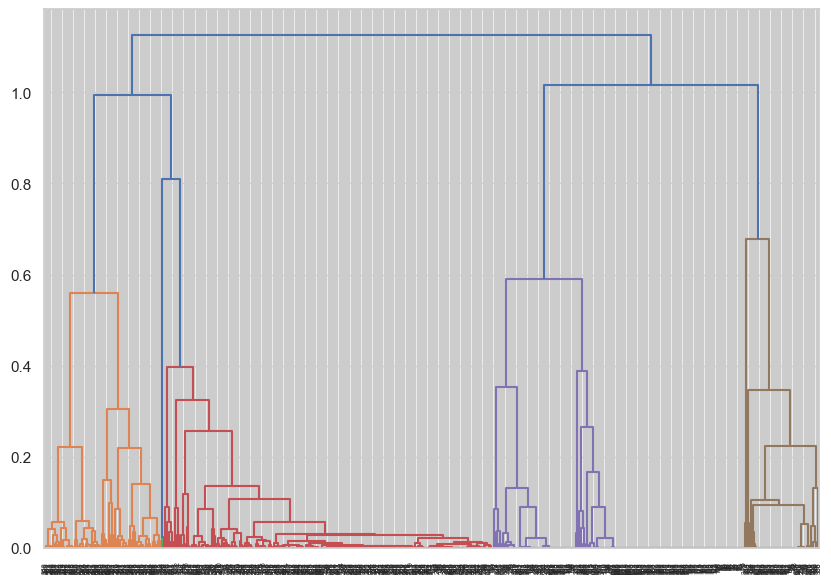

In [112]:
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df12, method='complete', metric='correlation'))
plt.savefig('dend.jpg', dpi = 300)

In [113]:
cluster = AgglomerativeClustering(n_clusters=2, metric='correlation', linkage='complete')
df2['icluster2'] = cluster.fit_predict(df12)
cluster = AgglomerativeClustering(n_clusters=4, metric='correlation', linkage='complete')
df2['icluster4'] = cluster.fit_predict(df12)

#### Диаграммы размаха для 1 семестра

In [115]:
cols = df1.columns[1:-4]
cols

Index(['number_of_sess', 'average_len', 'average_actions', 'reading_reading',
       'test_test', 'exercise_exercise', 'reading_test', 'test_reading',
       'reading_exercise', 'exercise_reading', 'test_exercise',
       'exercise_test', 'training_reading', 'reading_training',
       'training_test', 'test_training'],
      dtype='object')

In [116]:
df1['icluster4'].value_counts()

icluster4
0    688
3    207
1     60
2     31
Name: count, dtype: int64

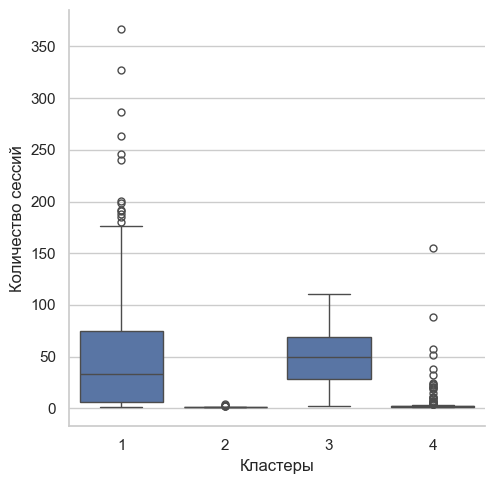

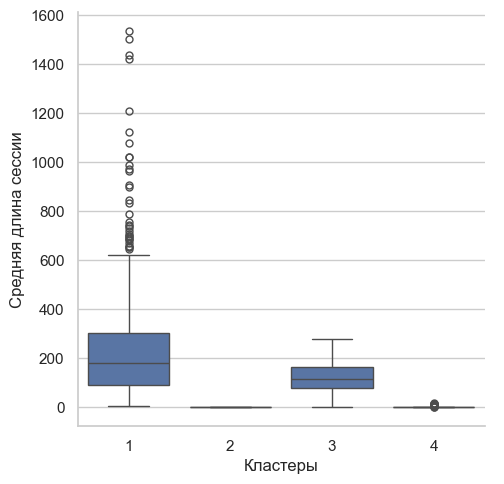

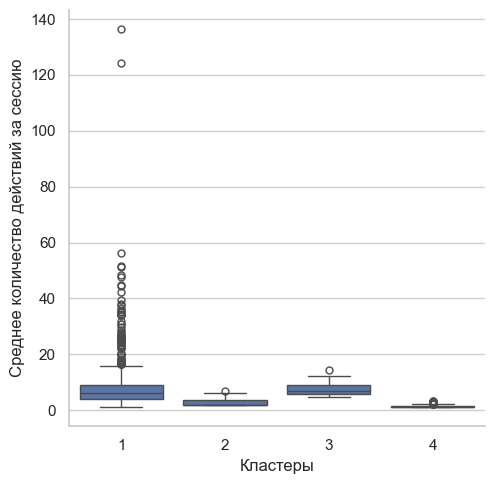

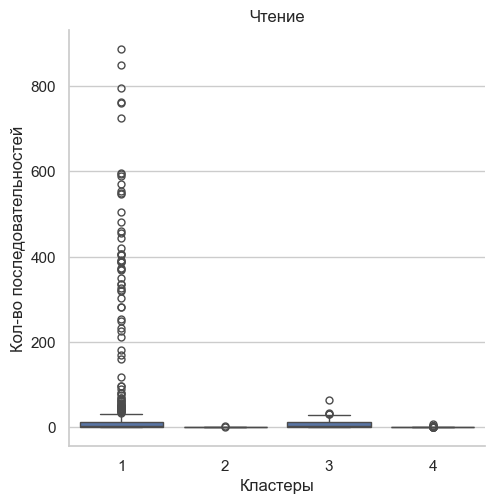

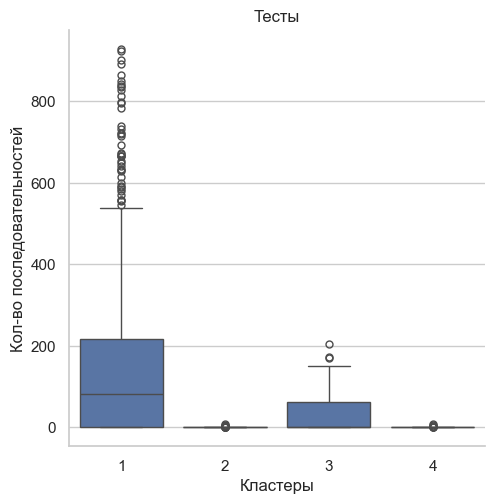

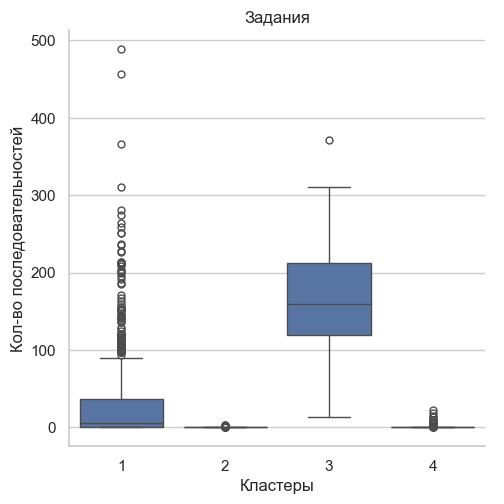

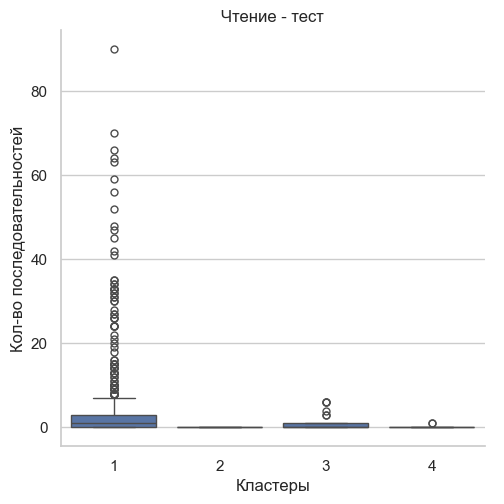

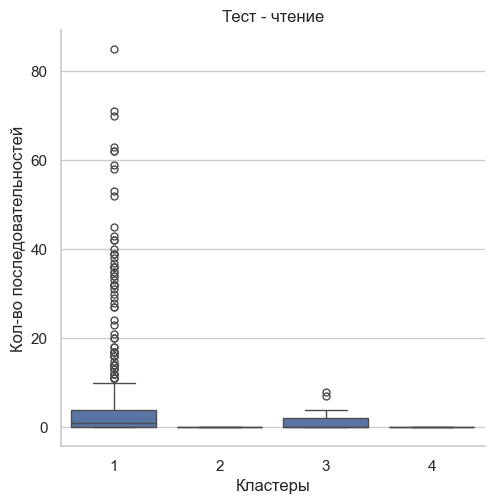

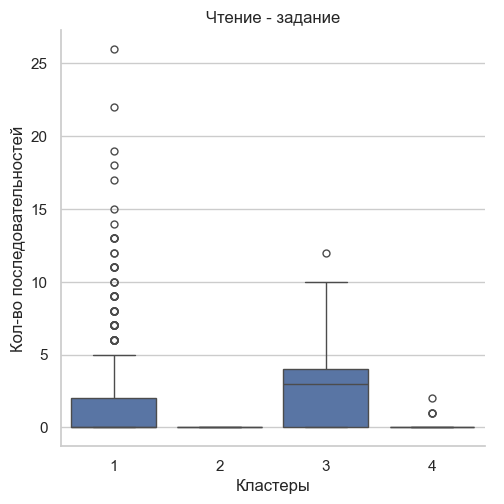

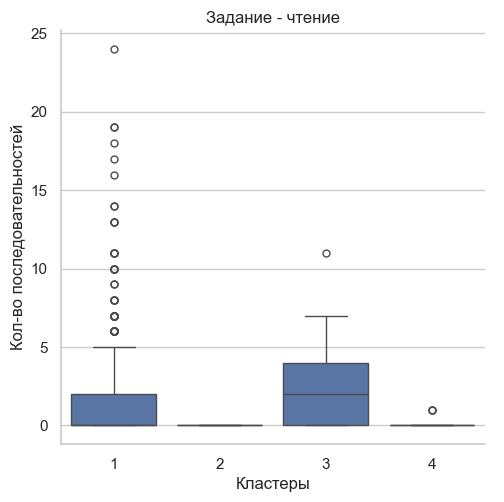

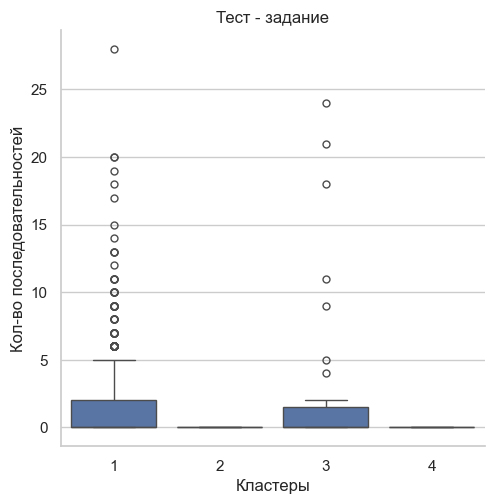

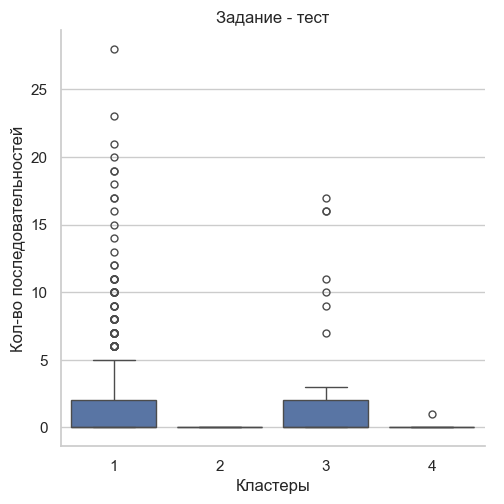

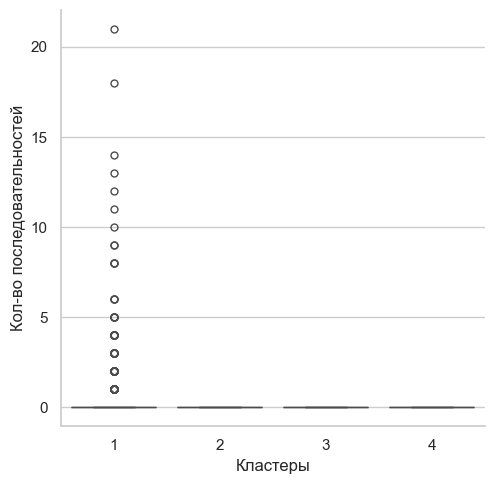

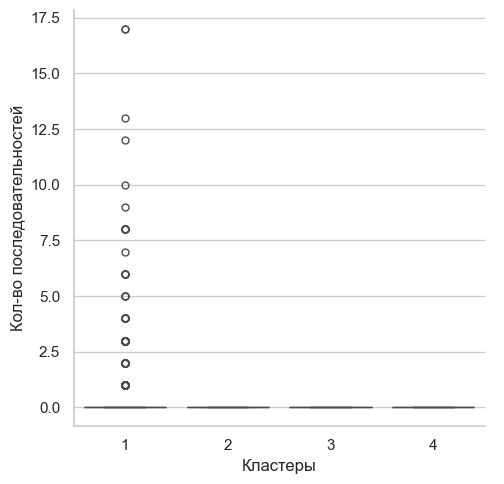

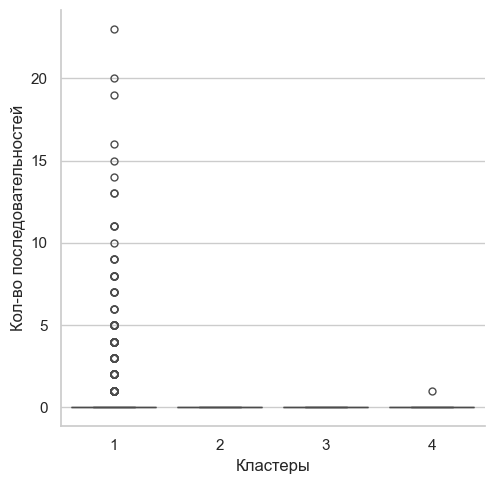

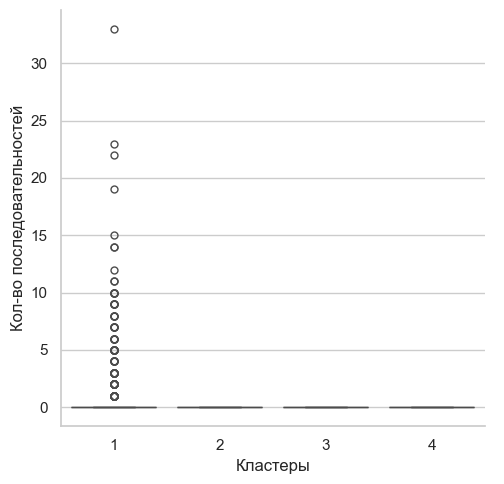

In [117]:
for k in range(len(cols)):
    g = sns.catplot(data=df1, x='icluster4', y=cols[k],  kind='box')
    if k > 2:
        g.set_axis_labels('Кластеры', 'Кол-во последовательностей')
        if k == 3: g.set(title = 'Чтение')
        elif k == 4: g.set(title = 'Тесты')
        elif k == 5: g.set(title = 'Задания')
        elif k == 6: g.set(title = 'Чтение - тест')
        elif k == 7: g.set(title = 'Тест - чтение')
        elif k == 8: g.set(title = 'Чтение - задание')
        elif k == 9: g.set(title = 'Задание - чтение')
        elif k == 10: g.set(title = 'Тест - задание')
        elif k == 11: g.set(title = 'Задание - тест')
    elif k == 0: g.set_axis_labels('Кластеры', 'Количество сессий')
    elif k == 1: g.set_axis_labels('Кластеры', 'Средняя длина сессии')
    elif k == 2: g.set_axis_labels('Кластеры', 'Среднее количество действий за сессию')
    g.set_xticklabels(['1', '2', '3', '4'])

#### Диаграммы размаха для 2 семестра

In [119]:
df2['icluster4'].value_counts()

icluster4
0    302
2    229
3    106
1     68
Name: count, dtype: int64

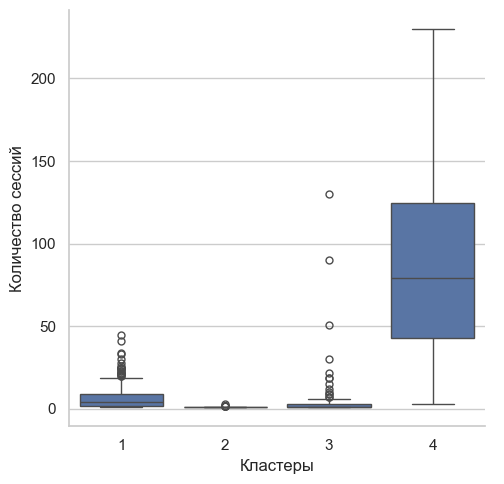

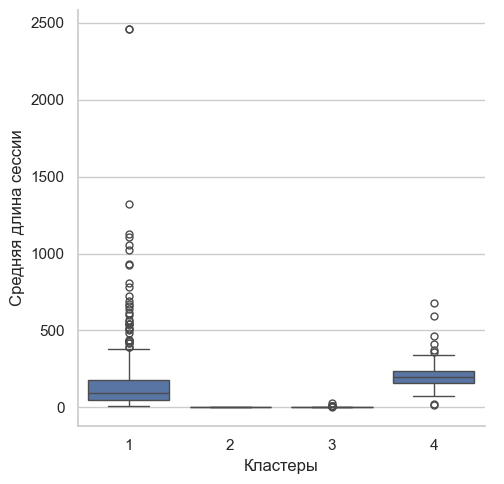

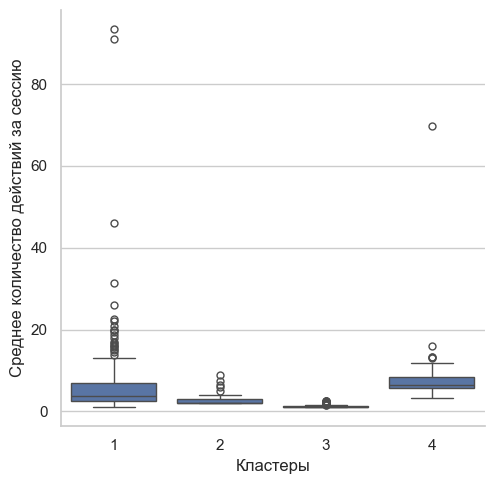

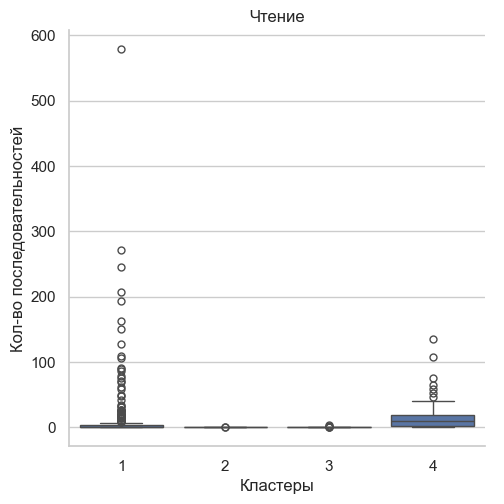

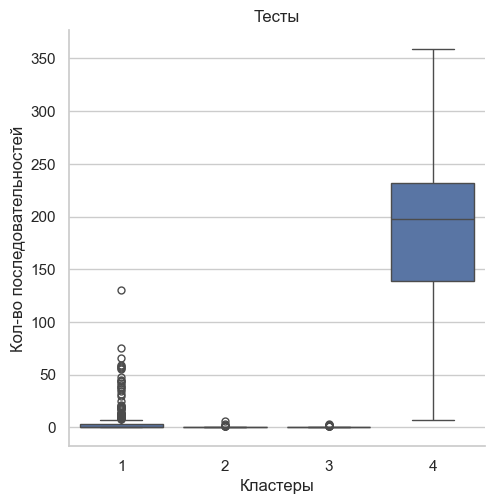

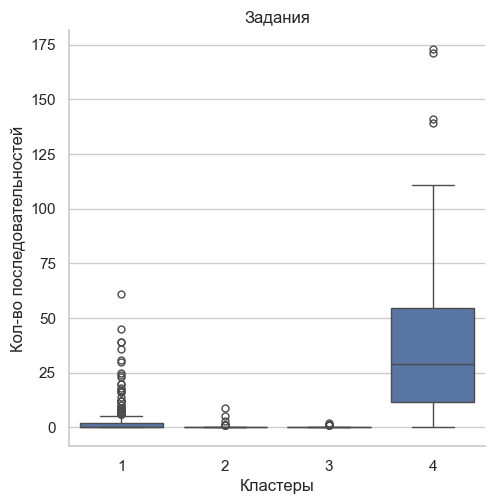

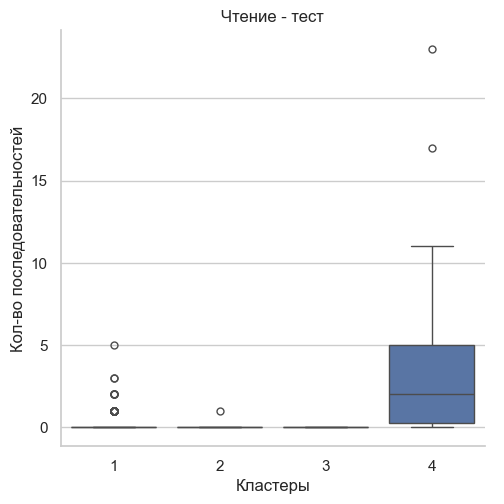

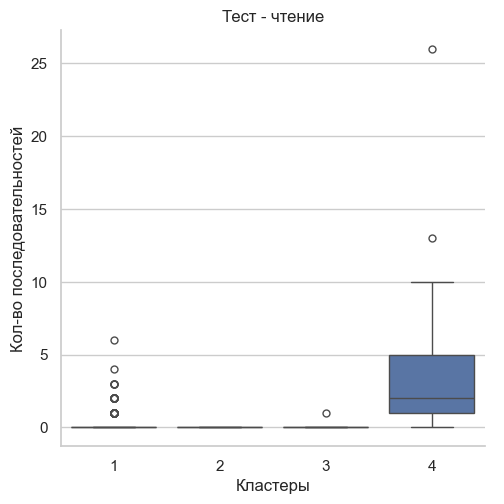

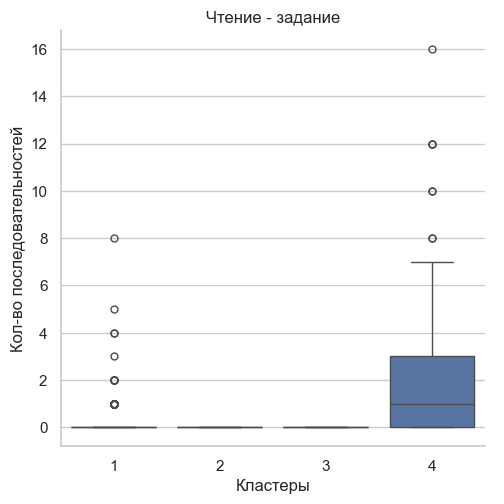

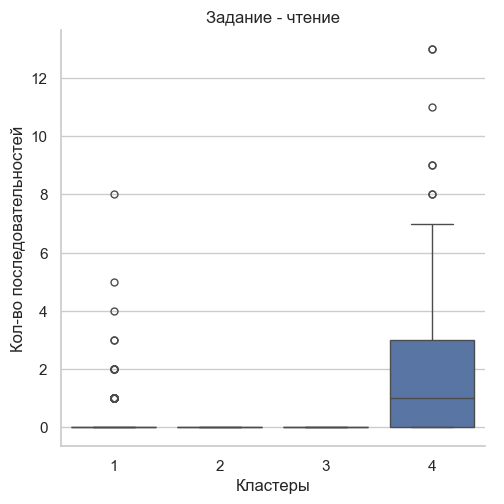

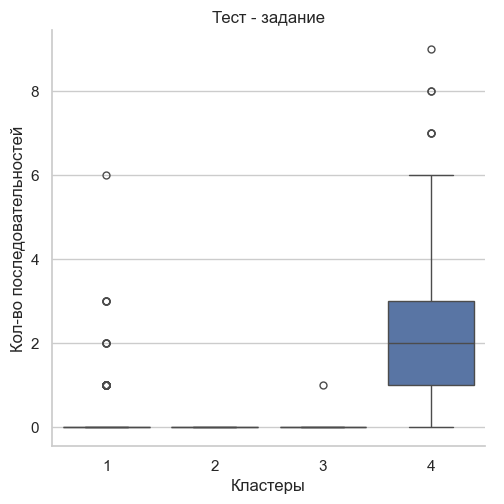

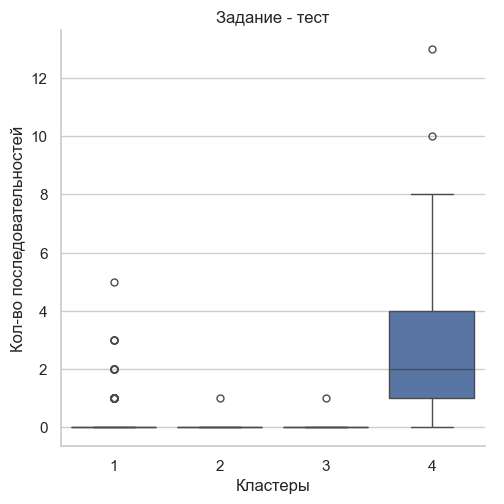

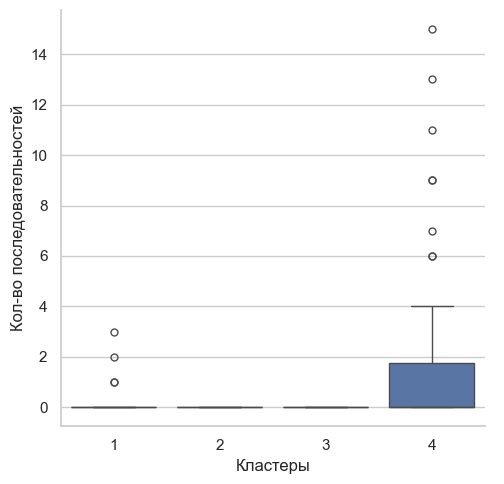

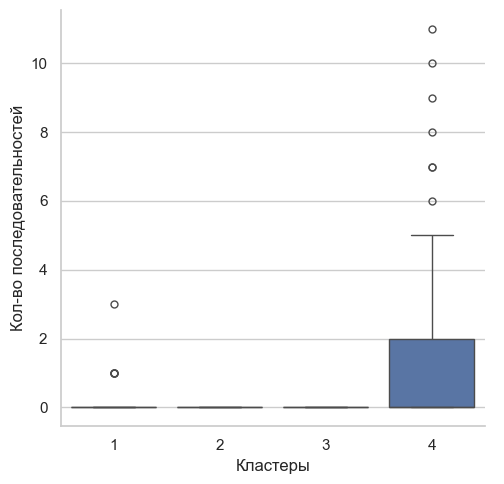

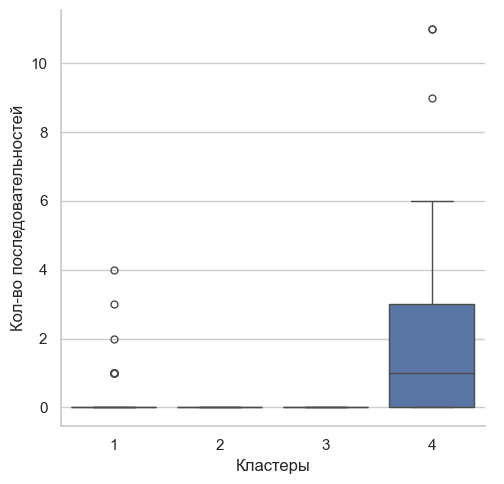

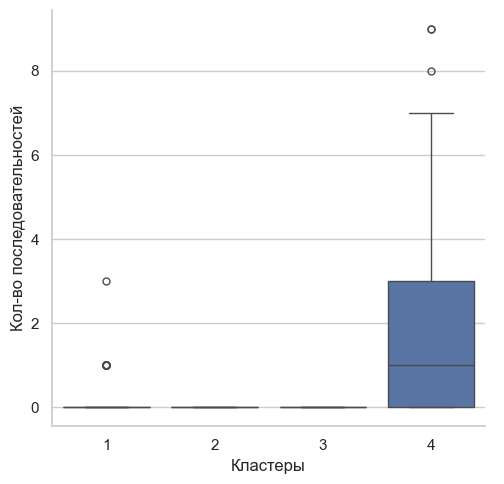

In [120]:
for k in range(len(cols)):
    g = sns.catplot(data=df2, x='icluster4', y=cols[k],  kind='box')
    if k > 2:
        g.set_axis_labels('Кластеры', 'Кол-во последовательностей')
        if k == 3: g.set(title = 'Чтение')
        elif k == 4: g.set(title = 'Тесты')
        elif k == 5: g.set(title = 'Задания')
        elif k == 6: g.set(title = 'Чтение - тест')
        elif k == 7: g.set(title = 'Тест - чтение')
        elif k == 8: g.set(title = 'Чтение - задание')
        elif k == 9: g.set(title = 'Задание - чтение')
        elif k == 10: g.set(title = 'Тест - задание')
        elif k == 11: g.set(title = 'Задание - тест')
    elif k == 0: g.set_axis_labels('Кластеры', 'Количество сессий')
    elif k == 1: g.set_axis_labels('Кластеры', 'Средняя длина сессии')
    elif k == 2: g.set_axis_labels('Кластеры', 'Среднее количество действий за сессию')
    g.set_xticklabels(['1', '2', '3', '4'])

#### Согласованность кластеров, полученных по количеству кликов и по сессиям обучения

In [122]:
df1_cl = pd.merge(df_1, df1, how='inner', left_on='name', right_on='name')
df2_cl = pd.merge(df_2, df2, how='inner', left_on='name', right_on='name')

In [123]:
def metrics_clucterings(df): # метрики устойчивости кластеризации
    print('rand_score')
    print('2 клаcтера:', rand_score(df['icluster2_x'], df['icluster2_y']))
    print('4 клаcтера:', rand_score(df['icluster4_x'], df['icluster4_y']))
    print()
    print('fowlkes_mallows_score')
    print('2 клаcтера:', fowlkes_mallows_score(df['icluster2_x'], df['icluster2_y']))
    print('4 клаcтера:', fowlkes_mallows_score(df['icluster4_x'], df['icluster4_y']))
    print()

In [124]:
metrics_clucterings(df1_cl)

rand_score
2 клаcтера: 0.5213393601795698
4 клаcтера: 0.5370043553917279

fowlkes_mallows_score
2 клаcтера: 0.5763183329500644
4 клаcтера: 0.4522929665544744



In [125]:
metrics_clucterings(df2_cl)

rand_score
2 клаcтера: 0.4999194068343005
4 клаcтера: 0.6047106705351386

fowlkes_mallows_score
2 клаcтера: 0.5324699849579987
4 клаcтера: 0.38269710530164597



## Часть 5. Портреты кластеров

#### 1. Качественный подход

In [128]:
df1_clusters = df1[['name', 'icluster2', 'icluster4']]
df2_clusters = df2[['name', 'icluster2', 'icluster4']]

In [129]:
# # i-индекс в датасете sessions, j-индекс в датасете df
SEQ_new_1 = []
for i in range(len(sessions1)):
    j = df1[df1['name'] == sessions1[i][0]['name'].unique()[0]].index[0]
    number_of_sess = len(sessions1[i])
    for k in range(number_of_sess):
        seq = []
        seq.append(sessions1[i][0]['name'].unique()[0])
        seq.append(sessions1[i][k].loc[sessions1[i][k].index[0], 'type'])
        for p in range(1, len(sessions1[i][k].index)):
            seq.append(sessions1[i][k].loc[sessions1[i][k].index[p], 'type'])
        SEQ_new_1.append(seq)

DF_4_clusters_1 = pd.DataFrame(SEQ_new_1)
DF_4_clusters_1.rename(columns={0: 'name'}, inplace=True)
DF_4_clusters_1 = pd.merge(DF_4_clusters_1, df1_clusters, how='left', on='name')

# # i-индекс в датасете sessions, j-индекс в датасете df
SEQ_new_2 = []
for i in range(len(sessions2)):
    j = df2[df2['name'] == sessions2[i][0]['name'].unique()[0]].index[0]
    number_of_sess = len(sessions2[i])
    for k in range(number_of_sess):
        seq = []
        seq.append(sessions2[i][0]['name'].unique()[0])
        seq.append(sessions2[i][k].loc[sessions2[i][k].index[0], 'type'])
        for p in range(1, len(sessions2[i][k].index)):
            seq.append(sessions2[i][k].loc[sessions2[i][k].index[p], 'type'])
        SEQ_new_2.append(seq)

DF_4_clusters_2 = pd.DataFrame(SEQ_new_2)
DF_4_clusters_2.rename(columns={0: 'name'}, inplace=True)
DF_4_clusters_2 = pd.merge(DF_4_clusters_2, df2_clusters, how='left', on='name')

In [130]:
DF_11 = DF_4_clusters_2[DF_4_clusters_2['icluster4'] == 3]
DF_11 = DF_11.drop(['name', 'icluster2', 'icluster4'], axis=1)
#DF_11 = DF_11.iloc[:,0:10]
DF_11.describe()

1     2     3     4     5     6     7     8     9    10    11  \
count    9135  7503  5979  4394  3517  2891  2404  2039  1764  1513  1320   
unique      6     6     6     6     6     6     6     6     6     6     6   
top     click  test  test  test  test  test  test  test  test  test  test   
freq     5299  2845  2731  2152  1775  1550  1312  1133   988   830   753   

          12    13    14    15    16    17    18    19    20    21    22  \
count   1164  1048   923   826   753   686   631   588   540   489   441   
unique     6     6     6     6     6     6     6     6     6     6     6   
top     test  test  test  test  test  test  test  test  test  test  test   
freq     684   593   522   459   440   395   362   330   300   290   251   

          23    24    25    26    27    28    29    30    31    32    33  \
count    415   389   357   340   315   298   278   262   256   245   228   
unique     5     5     6     6     6     6     6     5     5     5     5   
top     test  test  test  test  test  test  test  test  test  test  test   
freq     248   223   202   194   171   168   156   143   145   134   131   

          34    35    36    37    38    39    40    41    42    43    44  \
count    215   209   192   182   172   165   153   148   140   132   123   
unique     5     5     5     6     5     6     6     6     5     5     5   
top     test  test  test  test  test  test  test  test  test  test  test   
freq     117   119   103    98    84    83    77    70    64    60    53   

          45    46    47    48        49    50        51        52        53  \
count    115   112   108   103       101    96        91        87        85   
unique     4     5     6     5         5     5         5         5         5   
top     test  test  test  test  training  test  training  training  training   
freq      51    54    52    45        45    42        42        41        40   

              54        55        56        57        58        59        60  \
count         81        78        74        68        67        67        66   
unique         5         5         5         5         4         5         4   
top     training  training  training  training  training  training  training   
freq          40        38        36        40        38        40        40   

              61        62        63        64        65        66        67  \
count         65        64        61        60        59        57        57   
unique         4         4         4         4         4         4         3   
top     training  training  training  training  training  training  training   
freq          41        36        37        38        34        38        35   

              68        69        70        71        72        73        74  \
count         56        53        51        50        49        49        46   
unique         3         4         3         4         5         4         4   
top     training  training  training  training  training  training  training   
freq          37        34        33        31        32        32        32   

              75        76        77        78        79        80        81  \
count         46        46        44        43        42        39        39   
unique         4         4         4         5         4         3         3   
top     training  training  training  training  training  training  training   
freq          31        32        27        27        29        25        27   

              82        83        84        85        86        87        88  \
count         37        36        36        36        34        34        34   
unique         4         3         4         3         3         3         4   
top     training  training  training  training  training  training  training   
freq          24        26        27        28        26        25        24   

              89        90        91        92        93        94        95 

In [131]:
DF_11 = DF_4_clusters_1[DF_4_clusters_1['icluster4'] == 0]
DF_11 = DF_11.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_11 = DF_11.iloc[:,0:10]
DF_12 = DF_4_clusters_1[DF_4_clusters_1['icluster4'] == 1]
DF_12 = DF_12.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_12 = DF_12.iloc[:,0:353]
DF_13 = DF_4_clusters_1[DF_4_clusters_1['icluster4'] == 2]
DF_13 = DF_13.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_14 = DF_4_clusters_1[DF_4_clusters_1['icluster4'] == 3]
DF_14 = DF_14.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_14 = DF_14.iloc[:,0:86]

DF_21 = DF_4_clusters_2[DF_4_clusters_2['icluster4'] == 0]
DF_21 = DF_21.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_21 = DF_21.iloc[:,0:6]
DF_22 = DF_4_clusters_2[DF_4_clusters_2['icluster4'] == 1]
DF_22 = DF_22.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_23 = DF_4_clusters_2[DF_4_clusters_2['icluster4'] == 2]
DF_23 = DF_23.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_23 = DF_23.iloc[:,0:6]
DF_24 = DF_4_clusters_2[DF_4_clusters_2['icluster4'] == 3]
DF_24 = DF_24.drop(['name', 'icluster2', 'icluster4'], axis=1)
DF_24 = DF_24.iloc[:,0:76]

In [132]:
Series = []
for i in range(len(DF_11.columns)):
    Series.append(pd.DataFrame(DF_11[i+1].value_counts()))
DF_FULL_SESSIONS_11 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_11.index = range(len(DF_FULL_SESSIONS_11))

Series = []
for i in range(len(DF_12.columns)):
    Series.append(pd.DataFrame(DF_12[i+1].value_counts()))
DF_FULL_SESSIONS_12 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_12.index = range(len(DF_FULL_SESSIONS_12))

Series = []
for i in range(len(DF_13.columns)):
    Series.append(pd.DataFrame(DF_13[i+1].value_counts()))
DF_FULL_SESSIONS_13 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_13.index = range(len(DF_FULL_SESSIONS_13))

Series = []
for i in range(len(DF_14.columns)):
    Series.append(pd.DataFrame(DF_14[i+1].value_counts()))
DF_FULL_SESSIONS_14 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_14.index = range(len(DF_FULL_SESSIONS_14))

Series = []
for i in range(len(DF_21.columns)):
    Series.append(pd.DataFrame(DF_21[i+1].value_counts()))
DF_FULL_SESSIONS_21 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_21.index = range(len(DF_FULL_SESSIONS_21))

Series = []
for i in range(len(DF_22.columns)):
    Series.append(pd.DataFrame(DF_22[i+1].value_counts()))
DF_FULL_SESSIONS_22 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_22.index = range(len(DF_FULL_SESSIONS_22))

Series = []
for i in range(len(DF_23.columns)):
    Series.append(pd.DataFrame(DF_23[i+1].value_counts()))
DF_FULL_SESSIONS_23 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_23.index = range(len(DF_FULL_SESSIONS_23))

Series = []
for i in range(len(DF_24.columns)):
    Series.append(pd.DataFrame(DF_24[i+1].value_counts()))
DF_FULL_SESSIONS_24 = pd.concat(Series, axis=1).transpose().fillna(0)
DF_FULL_SESSIONS_24.index = range(len(DF_FULL_SESSIONS_24))

#### 1 семестр

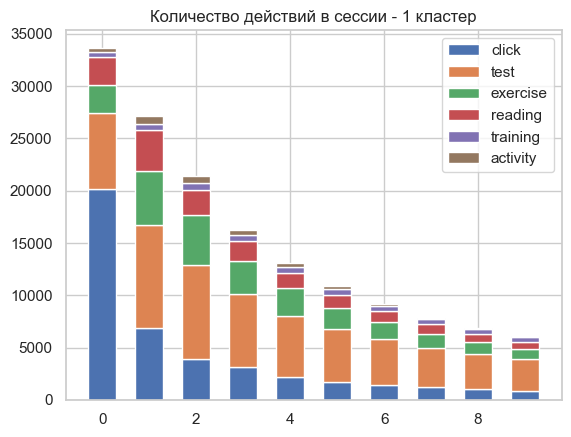

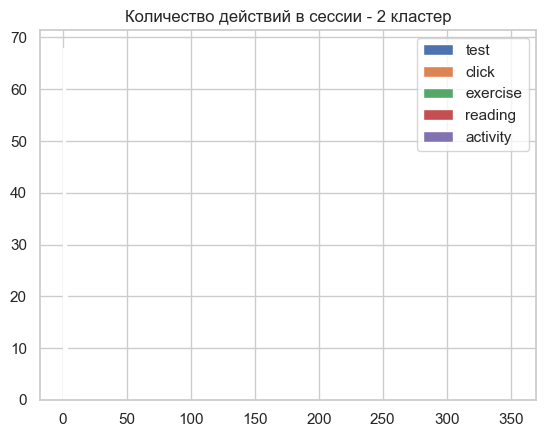

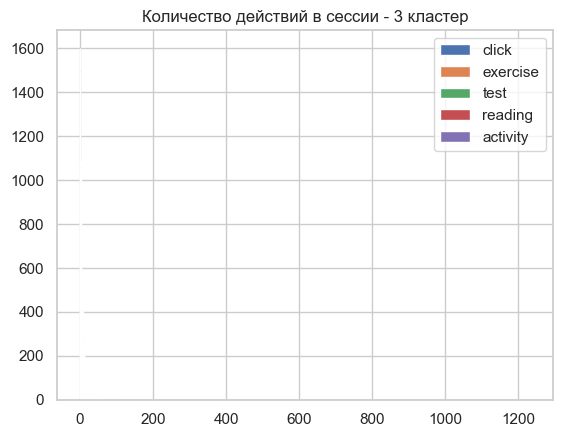

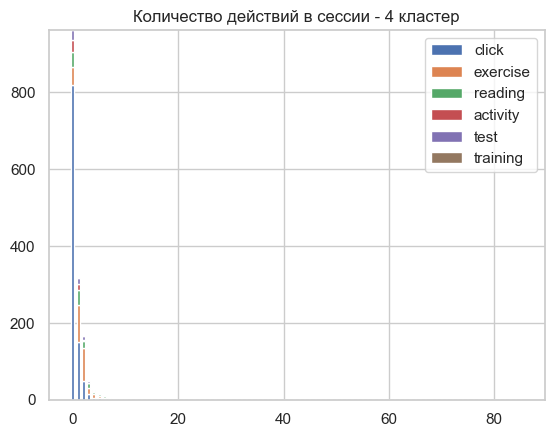

In [134]:
import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_11.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_11.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_11[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_11[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 1 кластер')
#ax.set(xlim = (-0.5,40), ylim = (0,150), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_12.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_12.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_12[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_12[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 2 кластер')
#ax.set(xlim = (-0.5,40), ylim = (0,15000), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_13.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_13.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_13[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_13[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 3 кластер')
#ax.set(xlim = (-0.5,40), ylim = (0,900), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_14.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_14.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_14[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_14[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 4 кластер')
#ax.set(xlim = (-0.5,40), ylim = (0,25000), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

<Axes: >

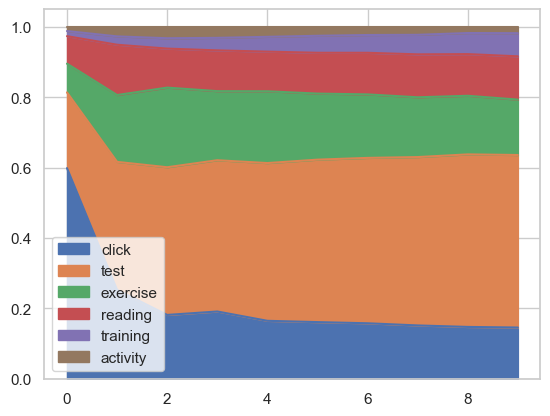

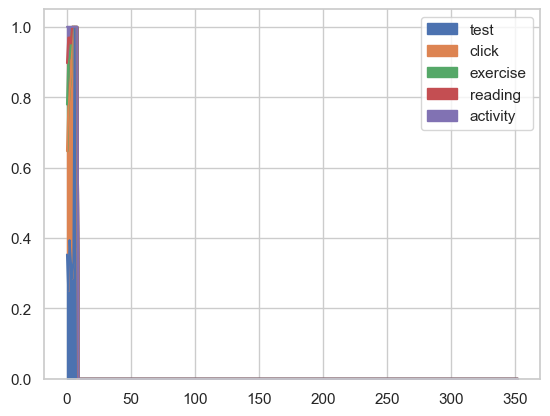

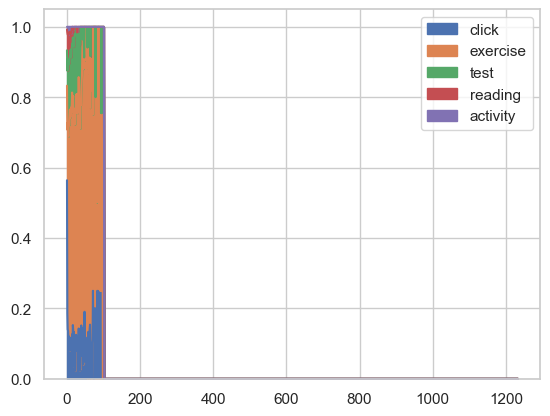

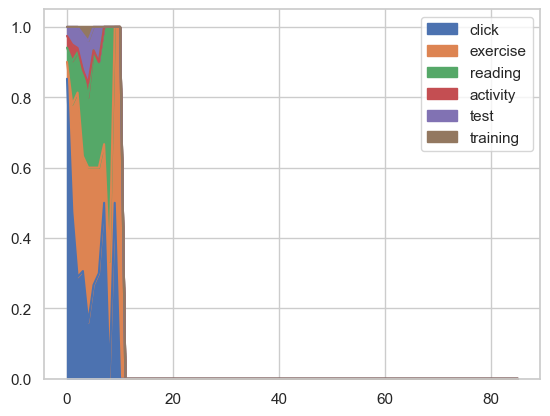

In [135]:
DF_FULL_SESSIONS_11.div(DF_FULL_SESSIONS_11.sum(axis=1), axis=0).plot.area()
DF_FULL_SESSIONS_12.div(DF_FULL_SESSIONS_12.sum(axis=1), axis=0).plot.area()
DF_FULL_SESSIONS_13.div(DF_FULL_SESSIONS_13.sum(axis=1), axis=0).plot.area()
DF_FULL_SESSIONS_14.div(DF_FULL_SESSIONS_14.sum(axis=1), axis=0).plot.area()

#### 2 семестр

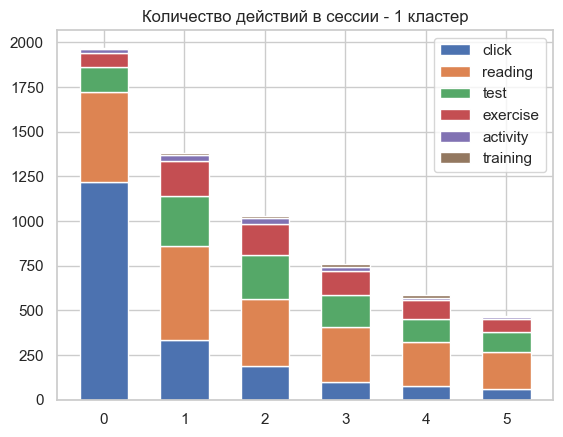

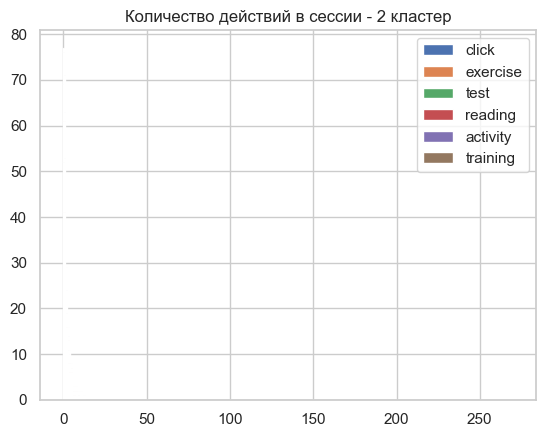

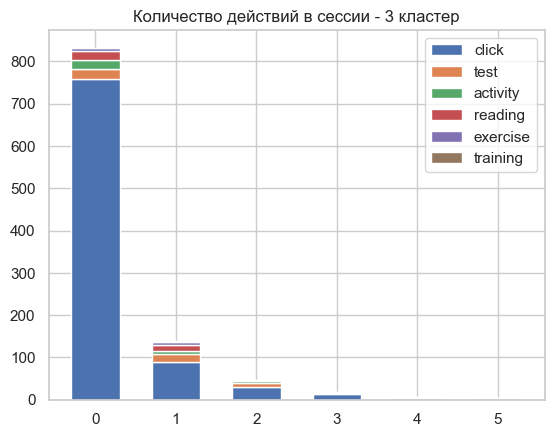

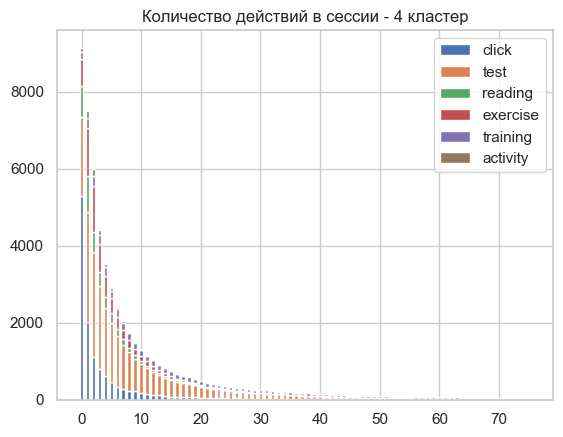

In [137]:
import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_21.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_21.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_21[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_21[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 1 кластер')
#ax.set(xlim = (-0.5,30), ylim = (0,3000), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_22.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_22.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_22[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_22[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 2 кластер')
#ax.set(xlim = (-0.5,30), ylim = (0,180), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_23.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_23.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_23[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_23[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 3 кластер')
#ax.set(xlim = (-0.5,30), ylim = (0,600), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

import matplotlib.pyplot as plt

category_names = (DF_FULL_SESSIONS_24.index)

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(category_names))

for nam in DF_FULL_SESSIONS_24.columns:
    p = ax.bar(category_names, DF_FULL_SESSIONS_24[nam], width, label=nam, bottom=bottom)
    bottom += DF_FULL_SESSIONS_24[nam]
    #ax.bar_label(p, label_type='center')

ax.set_title('Количество действий в сессии - 4 кластер')
#ax.set(xlim = (-0.5,30), ylim = (0,9000), xlabel = 'Номер действия', ylabel = 'Число действий')
ax.legend()

plt.show()

<Axes: >

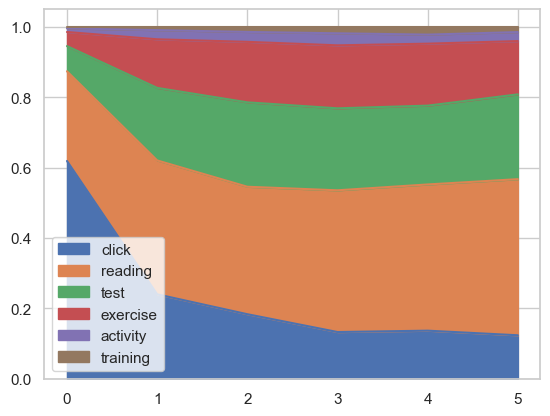

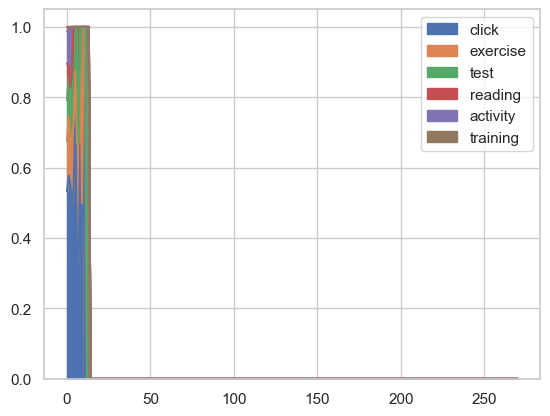

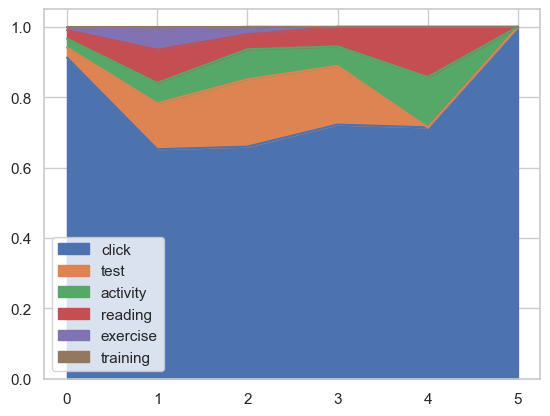

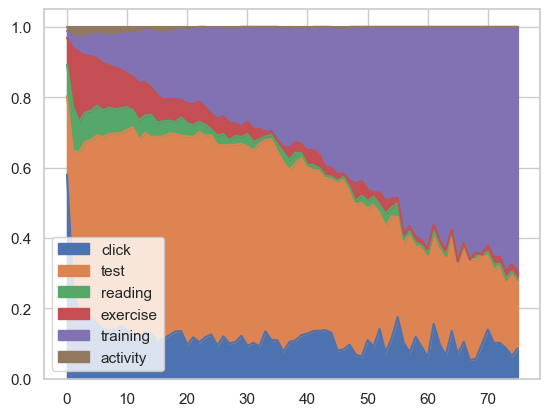

In [138]:
DF_FULL_SESSIONS_21.div(DF_FULL_SESSIONS_21.sum(axis=1), axis=0).plot.area()
DF_FULL_SESSIONS_22.div(DF_FULL_SESSIONS_22.sum(axis=1), axis=0).plot.area()
DF_FULL_SESSIONS_23.div(DF_FULL_SESSIONS_23.sum(axis=1), axis=0).plot.area()
DF_FULL_SESSIONS_24.div(DF_FULL_SESSIONS_24.sum(axis=1), axis=0).plot.area()

#### 2. Количественный подход

In [140]:
df_1_clusters = df1[['name', 'icluster2', 'icluster4']]
df_2_clusters = df2[['name', 'icluster2', 'icluster4']]

In [141]:
sem1_clusters = pd.merge(semestr1, df_1_clusters, how='left', on='name')

sem2_clusters = pd.merge(semestr2, df_2_clusters, how='left', on='name')

#### 1 семестр

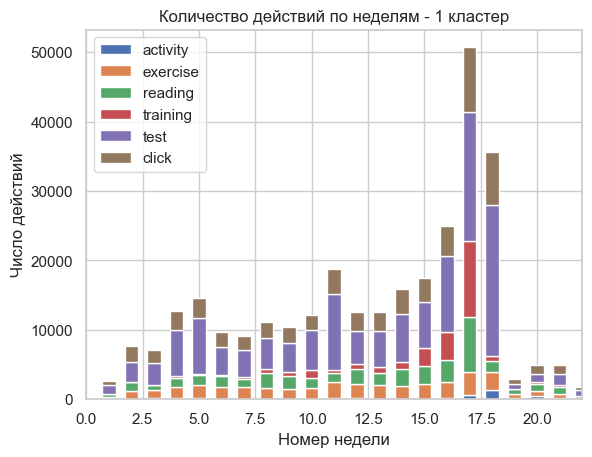

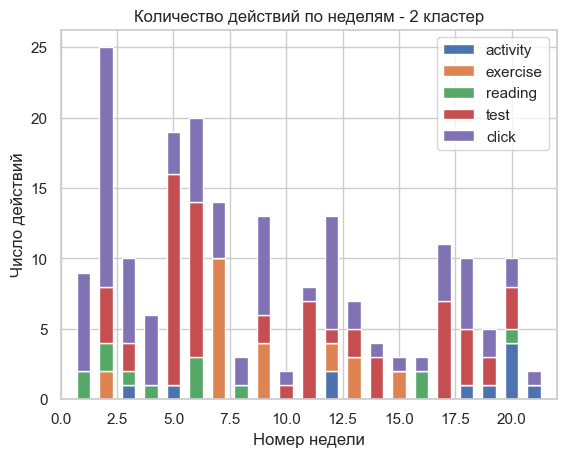

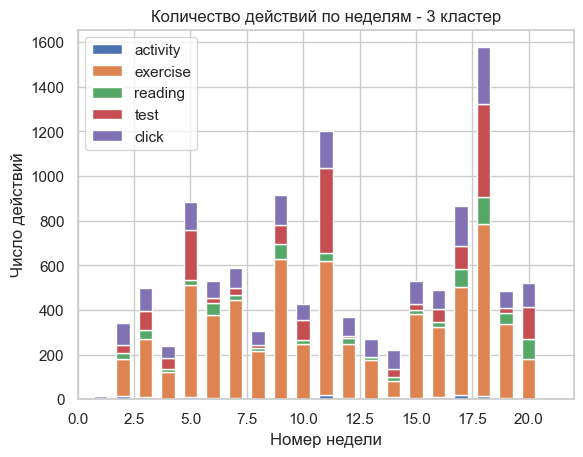

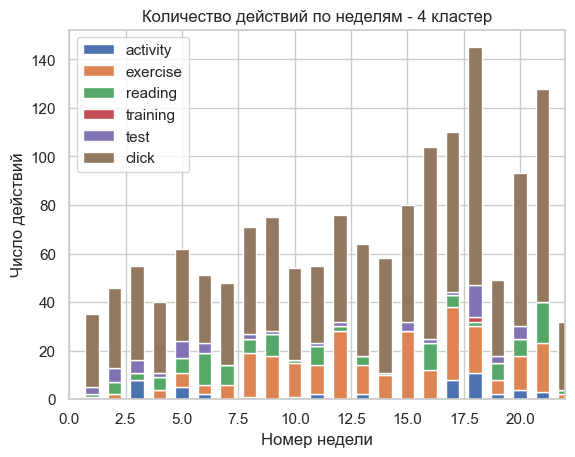

In [143]:
SEM1 = []
PIVOT_1 = []
PIVOT_DICT_1 = []
for i in range(4):
    df = sem1_clusters[sem1_clusters['icluster4'] == i][['date_of_action', 'type']]
    SEM1.append(df)
    
    pivot = pd.pivot_table(df, values=['type'], index=[df['date_of_action'].dt.isocalendar().week], columns=['type'], aggfunc="count", fill_value=0)
    pivot.index = [pivot.index[c]-34 if pivot.index[c]>34 else pivot.index[c]+18 for c in range(len(pivot.index))]
    pivot.sort_index(inplace=True)
    PIVOT_1.append(pivot)

    # pivot_dict = {'activity': pivot[('date_of_action', 'activity')],
    #               'exercise': pivot[('date_of_action', 'exercise')],
    #               'reading': pivot[('date_of_action', 'reading')],
    #               'training': pivot[('date_of_action', 'training')],
    #               'test': pivot[('date_of_action', 'test')],
    #               'click': pivot[('date_of_action', 'click')]}
    # df_weekly_actions = pd.DataFrame(pivot_dict)
    # PIVOT_DICT_1.append(df_weekly_actions)
    
    if (i != 1) and (i != 2):
        pivot_dict = {'activity': pivot[('date_of_action', 'activity')],
                  'exercise': pivot[('date_of_action', 'exercise')],
                  'reading': pivot[('date_of_action', 'reading')],
                  'training': pivot[('date_of_action', 'training')],
                  'test': pivot[('date_of_action', 'test')],
                  'click': pivot[('date_of_action', 'click')]}
        df_weekly_actions = pd.DataFrame(pivot_dict)
        PIVOT_DICT_1.append(df_weekly_actions)
        
    else:
        pivot_dict = {'activity': pivot[('date_of_action', 'activity')],
                      'exercise': pivot[('date_of_action', 'exercise')],
                  'reading': pivot[('date_of_action', 'reading')],
                  'test': pivot[('date_of_action', 'test')],
                  'click': pivot[('date_of_action', 'click')]}
        df_weekly_actions = pd.DataFrame(pivot_dict)
        PIVOT_DICT_1.append(df_weekly_actions)
        
    
    import matplotlib.pyplot as plt
    category_names = (df_weekly_actions.index)

    width = 0.6  # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    bottom = np.zeros(len(category_names))

    for nam, pivd in pivot_dict.items():
        p = ax.bar(category_names, pivd, width, label=nam, bottom=bottom)
        bottom += pivd
        #ax.bar_label(p, label_type='center')

    ax.set_title(f'Количество действий по неделям - {i+1} кластер')
    ax.set(xlim = (0,22), xlabel = 'Номер недели', ylabel = 'Число действий')
    ax.legend()

    plt.show()

<Axes: >

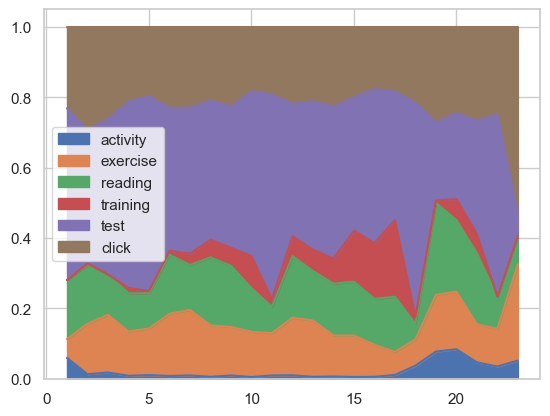

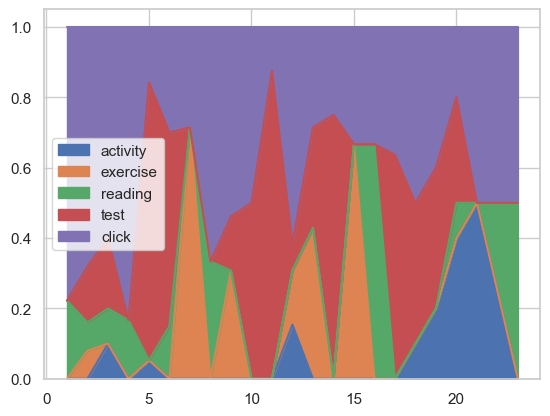

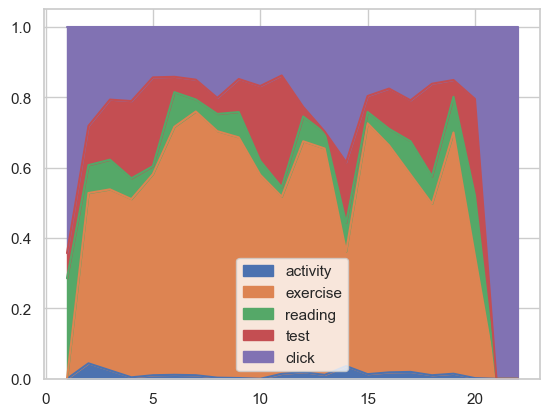

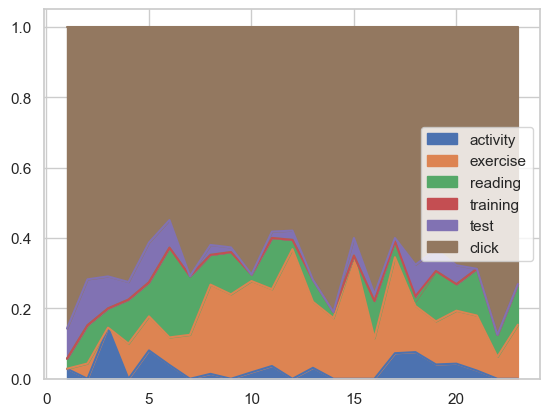

In [144]:
PIVOT_DICT_1[0].div(PIVOT_DICT_1[0].sum(axis=1), axis=0).plot.area()
PIVOT_DICT_1[1].div(PIVOT_DICT_1[1].sum(axis=1), axis=0).plot.area()
PIVOT_DICT_1[2].div(PIVOT_DICT_1[2].sum(axis=1), axis=0).plot.area()
PIVOT_DICT_1[3].div(PIVOT_DICT_1[3].sum(axis=1), axis=0).plot.area()

#### 2 семестр

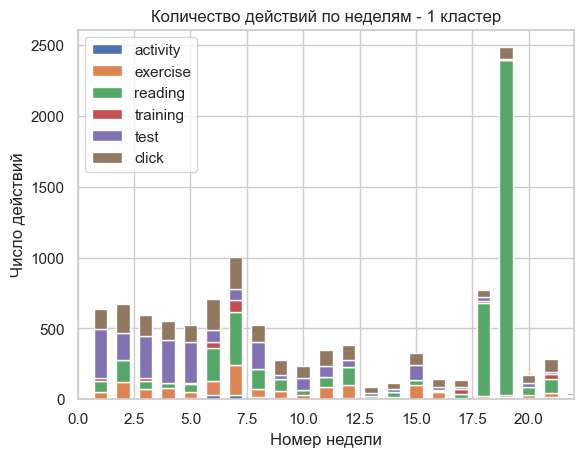

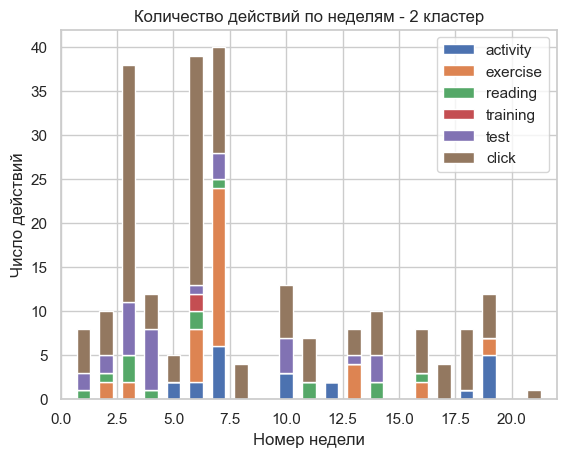

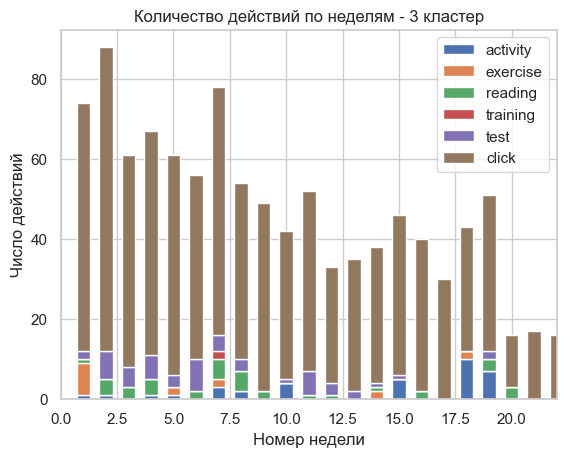

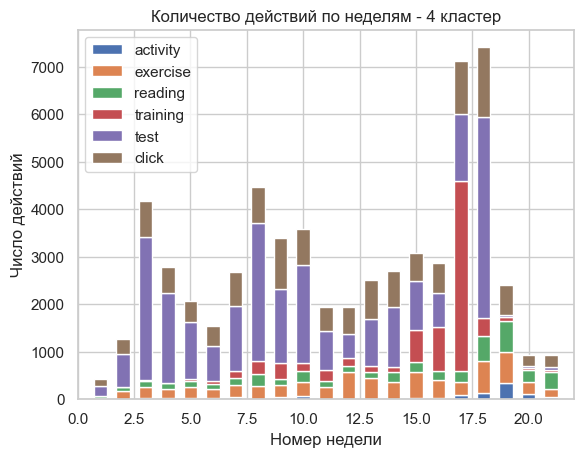

In [146]:
SEM2 = []
PIVOT_2 = []
PIVOT_DICT_2 = []
for i in range(4):
    df = sem2_clusters[sem2_clusters['icluster4'] == i][['date_of_action', 'type']]
    SEM2.append(df)
    
    pivot = pd.pivot_table(df, values=['type'], index=[df['date_of_action'].dt.isocalendar().week], columns=['type'], aggfunc="count", fill_value=0)
    pivot.index = [pivot.index[c]-4 if pivot.index[c]>4 else pivot.index[c]+18 for c in range(len(pivot.index))]
    pivot.sort_index(inplace=True)
    PIVOT_2.append(pivot)

    pivot_dict = {'activity': pivot[('date_of_action', 'activity')],
                  'exercise': pivot[('date_of_action', 'exercise')],
                  'reading': pivot[('date_of_action', 'reading')],
                  'training': pivot[('date_of_action', 'training')],
                  'test': pivot[('date_of_action', 'test')],
                  'click': pivot[('date_of_action', 'click')]}
    df_weekly_actions = pd.DataFrame(pivot_dict)
    PIVOT_DICT_2.append(df_weekly_actions)
    
    import matplotlib.pyplot as plt
    category_names = (df_weekly_actions.index)

    width = 0.6  # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    bottom = np.zeros(len(category_names))

    for nam, pivd in pivot_dict.items():
        p = ax.bar(category_names, pivd, width, label=nam, bottom=bottom)
        bottom += pivd
        #ax.bar_label(p, label_type='center')

    ax.set_title(f'Количество действий по неделям - {i+1} кластер')
    ax.set(xlim = (0,22), xlabel = 'Номер недели', ylabel = 'Число действий')
    ax.legend()

    plt.savefig(f'pic-{i+1}.jpg', dpi = 300)
    plt.show()

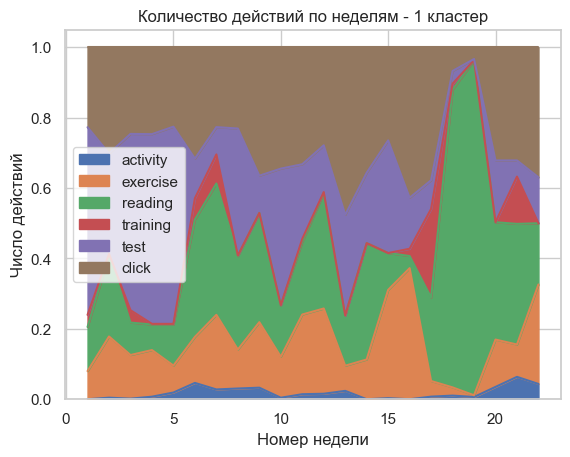

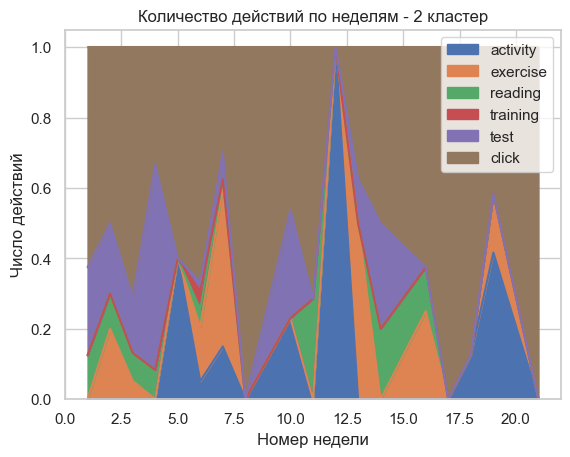

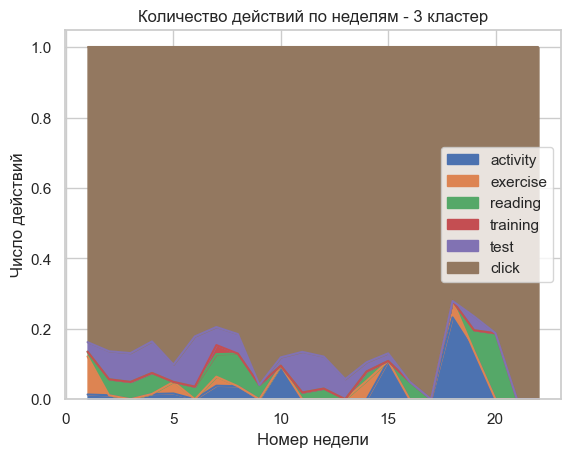

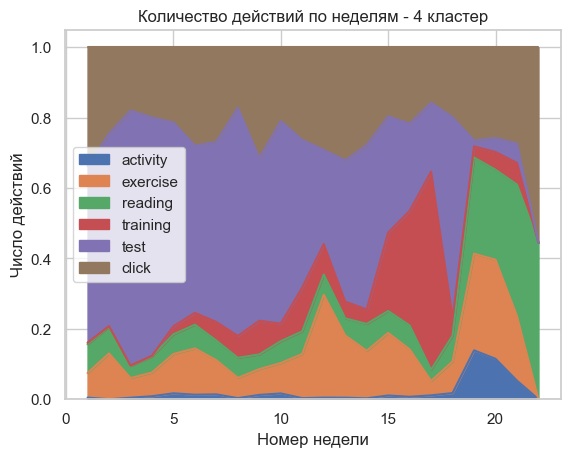

In [147]:
PIVOT_DICT_2[0].div(PIVOT_DICT_2[0].sum(axis=1), axis=0).plot.area(xlabel = 'Номер недели', ylabel = 'Число действий', title = 'Количество действий по неделям - 1 кластер')
plt.savefig('fig-1.jpg', dpi = 300)
PIVOT_DICT_2[1].div(PIVOT_DICT_2[1].sum(axis=1), axis=0).plot.area(xlabel = 'Номер недели', ylabel = 'Число действий', title = 'Количество действий по неделям - 2 кластер')
plt.savefig('fig-2.jpg', dpi = 300)
PIVOT_DICT_2[2].div(PIVOT_DICT_2[2].sum(axis=1), axis=0).plot.area(xlabel = 'Номер недели', ylabel = 'Число действий', title = 'Количество действий по неделям - 3 кластер')
plt.savefig('fig-3.jpg', dpi = 300)
PIVOT_DICT_2[3].div(PIVOT_DICT_2[3].sum(axis=1), axis=0).plot.area(xlabel = 'Номер недели', ylabel = 'Число действий', title = 'Количество действий по неделям - 4 кластер')
plt.savefig('fig-4.jpg', dpi = 300)

In [148]:
number_of_students = []
for i in range(4):
    number_of_students.append(len(sem1_clusters[sem1_clusters['icluster4'] == i]['name'].unique()))
number_of_students

[688, 60, 31, 207]

In [149]:
number_of_students = []
for i in range(4):
    number_of_students.append(len(sem2_clusters[sem2_clusters['icluster4'] == i]['name'].unique()))
number_of_students

[302, 68, 229, 106]

In [150]:
def metrs(PIVOT, PIVOT_DICT):
    M = []
    for i in range(len(PIVOT)):
        metrics = pd.DataFrame()
        for c in PIVOT_DICT[i].columns:
            metrics.loc[c, 'mean_weeks'] = PIVOT_DICT[i][c].mean()
            #metrics.loc[c, 'mean_students'] = PIVOT_DICT[i][c].sum()/number_of_students[i]
            l = len(PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index())

            if l % 4 != 0:
                metrics.loc[c, 'Q1'] = PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//4]

                if l % 2 != 0:
                    metrics.loc[c, 'Q2'] = PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//2]
                else:
                    metrics.loc[c, 'Q2'] = (PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//2] +
                          PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//2 - 1]) / 2

                metrics.loc[c, 'Q3'] = PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][(3*l)//4]

            else:
                metrics.loc[c, 'Q1'] = (PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//4] +
                      PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//4 - 1]) / 2

                if len(PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()) % 2 != 0:
                    metrics.loc[c, 'Q2'] = PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//2]
                else:
                    metrics.loc[c, 'Q2'] = (PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//2] +
                          PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][l//2 - 1]) / 2

                metrics.loc[c, 'Q3'] = (PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][(3*l)//4] +
                      PIVOT_DICT[i][PIVOT_DICT[i][c] != 0][c].reset_index()[c][(3*l)//4 - 1]) / 2

            metrics['skew'] = PIVOT_DICT[i].skew()
        metrics = metrics.reset_index()
        metrics['cluster'] = i
        M.append(metrics)
    return M

In [151]:
M1 = metrs(PIVOT_1, PIVOT_DICT_1)
M2 = metrs(PIVOT_2, PIVOT_DICT_2)

In [152]:
metrics1 = pd.concat(M1).reset_index(drop=True)
pd.pivot_table(metrics1, index=['cluster', 'index'], values = ['mean_weeks', 'Q1', 'Q2', 'Q3', 'skew'])

Q1      Q2       Q3   mean_weeks      skew
cluster index                                                   
0       activity    78.0   126.0   1333.0   198.521739  3.565318
        click     2227.0  2755.0   7698.0  2726.782609  1.835264
        exercise  1712.0  2066.0   2653.0  1498.521739 -0.092022
        reading   1627.0  2209.0   1576.0  1726.521739  3.035658
        test      3937.0  4750.0  21672.0  5829.521739  1.719888
        training   199.5   554.0   7497.0  1075.956522  3.801495
1       activity     1.0     1.0      4.0     0.500000  2.634286
        click        6.0     4.5      4.0     3.954545  2.162382
        exercise    10.0     3.0      3.0     1.045455  3.088770
        reading      1.0     3.0      2.0     0.636364  1.262957
        test        11.0     4.0      7.0     2.909091  1.905262
2       activity     6.0    12.0      9.0     6.545455  0.561324
        click       75.0   125.0    181.0    92.772727  0.853085
        exercise   372.0   604.0    316.0   295.318182  0.502733
        reading     36.0    24.5     20.0    34.045455  1.462960
        test       123.0   236.0     40.0    83.545455  2.108997
3       activity     2.0     2.0     11.0     2.173913  1.704429
        click       28.0    44.0     98.0    45.608696  1.318662
        exercise    18.0    12.0     19.0    11.695652  0.618559
        reading     13.0     5.0      2.0     5.478261  1.068325
        test         4.5     1.0      1.5     2.652174  1.863221
        training     2.0     2.0      2.0     0.086957  4.795832

In [153]:
metrics2 = pd.concat(M2).reset_index(drop=True)
pd.pivot_table(metrics2, index=['cluster', 'index'], values = ['mean_weeks', 'Q1', 'Q2', 'Q3', 'skew'])

Q1     Q2      Q3   mean_weeks      skew
cluster index                                                
0       activity   33.0    5.0     8.0     7.727273  1.587492
        click     225.0  111.5    51.0   104.727273  0.785234
        exercise   93.0   86.0     6.0    56.363636  1.657864
        reading   237.0   99.0    32.0   216.409091  4.112041
        test       80.0   62.5    11.0   103.636364  1.130194
        training    1.0    1.0    34.0    12.136364  2.236349
1       activity    2.0    3.0     1.0     1.166667  1.655227
        click       3.0    6.0     5.0     7.055556  2.201816
        exercise    2.0   18.0     2.0     2.000000  3.306071
        reading     3.0    2.0     2.0     0.777778  0.969022
        test        6.0    1.0     4.0     1.611111  1.380075
        training    2.0    2.0     2.0     0.111111  4.242641
2       activity    1.0    2.5     5.0     1.590909  2.058742
        click      46.0   37.0    30.0    41.045455  0.166194
        exercise    2.0    2.0     2.0     0.727273  3.445716
        reading     4.0    3.5     1.0     1.681818  0.665175
        test        6.0    3.0     2.0     2.454545  0.835264
        training    2.0    2.0     2.0     0.090909  4.690416
3       activity   28.5    7.5    49.5    47.136364  3.253429
        click     432.0  540.5  1122.0   615.409091  0.557514
        exercise  203.0  244.0   385.0   305.863636  0.627598
        reading   104.0  118.5   225.0   198.136364  1.899714
        test      733.0  815.0   709.0  1214.590909  1.257293
        training   52.0  242.0   931.0   357.409091  4.163293

In [154]:
sem1_2 = sem1_clusters.drop(['icluster2'], axis = 1)
sem2_2 = sem2_clusters.drop(['icluster2'], axis = 1)

In [155]:
STUDS1 = pd.pivot_table(sem1_2, columns=['icluster4', 'type'], index = ['name'], aggfunc = 'count').fillna(0)
STUDS2 = pd.pivot_table(sem2_2, columns=['icluster4', 'type'], index = ['name'], aggfunc = 'count').fillna(0)

In [156]:
STUDS1.reset_index()
STUDS2.reset_index()
def studs (STUDS):
    mS_1 = pd.DataFrame()
    mS_2 = pd.DataFrame()
    mS_3 = pd.DataFrame()
    mS_4 = pd.DataFrame()
    for c in STUDS.columns:
        metrics_STUDS = pd.DataFrame()
        i = c[1]
        metrics_STUDS.loc[c[2], 'cluster'] = i
        metrics_STUDS.loc[c[2], 'mean_students'] = STUDS[c].sum()/number_of_students[i]
        l = len(STUDS[STUDS[c] != 0][c].reset_index())

        if l % 4 != 0:
            metrics_STUDS.loc[c[2], 'Q1'] = STUDS[STUDS[c] != 0][c].sort_values()[l//4]

            if l % 2 != 0:
                metrics_STUDS.loc[c[2], 'Q2'] = STUDS[STUDS[c] != 0][c].sort_values()[l//2]
            else:
                metrics_STUDS.loc[c[2], 'Q2'] = (STUDS[STUDS[c] != 0][c].sort_values()[l//2] +
                          STUDS[STUDS[c] != 0][c].sort_values()[l//2 - 1]) / 2

            metrics_STUDS.loc[c[2], 'Q3'] = STUDS[STUDS[c] != 0][c].sort_values()[(3*l)//4]

        else:
            metrics_STUDS.loc[c[2], 'Q1'] = (STUDS[STUDS[c] != 0][c].sort_values()[l//4] +
                      STUDS[STUDS[c] != 0][c].sort_values()[l//4 - 1]) / 2

            if len(STUDS[STUDS[c] != 0][c].reset_index()) % 2 != 0:
                metrics_STUDS.loc[c[2], 'Q2'] = STUDS[STUDS[c] != 0][c].sort_values()[l//2]
            else:
                metrics_STUDS.loc[c[2], 'Q2'] = (STUDS[STUDS[c] != 0][c].sort_values()[l//2] +
                          STUDS[STUDS[c] != 0][c].sort_values()[l//2 - 1]) / 2

            metrics_STUDS.loc[c[2], 'Q3'] = (STUDS[STUDS[c] != 0][c].sort_values()[(3*l)//4] +
                      STUDS[STUDS[c] != 0][c].sort_values()[(3*l)//4 - 1]) / 2

        colms = []
        print(metrics_STUDS)
        for col in STUDS.columns:
            if col[1] == i: colms.append(col)
        metrics_STUDS.loc[c[2],'skew'] = STUDS[colms].skew().reset_index(level=1, drop=True).reset_index(level=0).drop('level_0', axis = 1).loc[c[2],0] 
        metrics_STUDS = metrics_STUDS.reset_index()
        if i == 0: mS_1 = pd.concat([mS_1, metrics_STUDS])
        elif i == 1: mS_2 = pd.concat([mS_2, metrics_STUDS])
        elif i == 2: mS_3 = pd.concat([mS_3, metrics_STUDS])
        elif i == 3: mS_4 = pd.concat([mS_4, metrics_STUDS])
    mS = pd.concat([mS_1, mS_2, mS_3, mS_4]).reset_index(drop = True)
    return mS

In [157]:
clust_1 = pd.merge(df_1[['name', 'icluster4']], df_2[['name', 'icluster4']], how='outer', on='name')

In [158]:
clust_2 = pd.merge(df1[['name', 'icluster4']], df2[['name', 'icluster4']], how='outer', on='name')

In [159]:
def fx_sem1(cl):
    if cl['icluster4_x'] == 0:
        val = "стабильно активные"
    elif cl['icluster4_x'] == 1:
        val = "неактивные"
    elif cl['icluster4_x'] == 2:
        val = "активизирующиеся к сессии"
    elif cl['icluster4_x'] == 3:
        val = "устающие к сессии"
    else:
        val = "Error"
    return val

def fx_sem2(cl):
    if cl['icluster4_y'] == 0:
        val = "активизирующиеся к сессии"
    elif cl['icluster4_y'] == 1:
        val = "неактивные"
    elif cl['icluster4_y'] == 2:
        val = "устающие к сессии"
    elif cl['icluster4_y'] == 3:
        val = "стабильно активные"
    else:
        val = "Error"
    return val

In [160]:
clust_1['sem1'] = clust_1.apply (fx_sem1, axis=1)
clust_1['sem2'] = clust_1.apply (fx_sem2, axis=1)

clust_2['sem1'] = clust_2.apply (fx_sem1, axis=1)
clust_2['sem2'] = clust_2.apply (fx_sem2, axis=1)

In [161]:
clust_2.to_excel('clust_2.xlsx')
clust_1.to_excel('clust_1.xlsx')